In [1]:
from bidirectional_synthetic_utils import *
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# for loading checkpoints on test data, model, params, optim
# save_path = './checkpoints/bidirectional_exp7_synthetic_data/'
# epoch = 1799


# all_letters = [x for x in range(0,4)]
# n_letters = 4 #len(all_letters) # total number of possible symbols
# print("N Letters: ", n_letters)



# # load models

# model=pkl.load(open(save_path+'rnn_checkpoint_{}.pkl'.format(epoch), 'rb'))
# optim=pkl.load(open(save_path+'opt_checkpoint_{}.pkl'.format(epoch), 'rb'))
# params=pkl.load(open(save_path+'param_checkpoint.pkl', 'rb'))
# # train_data=pkl.load(open(save_path+'Tr.pkl', 'rb'))
# test_data=pkl.load(open(save_path+'Te_2.pkl', 'rb'))
# test_dataloader = DataLoader(test_data, batch_size=params.get("batch_size"))


In [13]:
load_before = True
if not load_before:

    def eval_batch(seq_tensor, rnn):
        rnn.eval()
        hidden = rnn.initHidden()
        rnn.cuda()
        outputs = []
        hiddens = []
        loss = 0
        seq_length = seq_tensor.size()[0]
        for i in range(seq_length-1):
            output, hidden = rnn(seq_tensor[i], hidden)        
            outputs.append(output)
            hiddens.append(hidden)
    #         this_loss = criterion(output, seq_tensor[i+1]) 
    #         loss += this_loss
        return outputs, hiddens

    def eval_all_test(test_dl, rnn, batch_size):
        for batch, data in enumerate(test_dl):
            if data.size()[0] == batch_size:
                pat = Variable(torch.transpose(data,0,1).cuda())
                outputs, hiddens = eval_batch(pat, rnn)
                return outputs, pat, hiddens

    predictions, labels,hidden_states = eval_all_test(test_dataloader, model, params.get('batch_size'))
    new_list_preds = []
    new_list_hiddens = []
    for i in predictions:
        new_list_preds.append(i.data.cpu().numpy())

    for i in hidden_states:
        new_list_hiddens.append(i.data.cpu().numpy())

    preds = np.argmax(np.array(new_list_preds),axis=2).T
    reals = labels.data.cpu().numpy().T
    hiddens = np.array(new_list_hiddens)


    # norm_loss = []
    # for i in range(1024):
    #     norm_loss.append(np.linalg.norm(preds[i]- reals[i,1:]))

    # np.mean(norm_loss)

In [17]:
# # Samples to plot
# pred_sample = preds[1]
# real_sample = reals[1,:]
# hidden_sample = hiddens[:,1,:]

# hidden_sample.shape



# pkl.dump(preds, open(save_path+"preds.pkl", 'wb'))
# pkl.dump(reals, open(save_path+"reals.pkl", 'wb'))
# pkl.dump(hiddens, open(save_path+"hiddens.pkl", 'wb'))


preds= pkl.load(open(save_path+"preds.pkl", 'rb'))
reals=pkl.load(open(save_path+"reals.pkl", 'rb'))
# hiddens = pkl.load(save_path+open("hiddens.pkl", 'rb'))


In [14]:
indexes_to_test = [np.random.randint(0,1024) for x in range(200)]
max(indexes_to_test)

1019

In [6]:
tsne_hiddens = hiddens[:,indexes_to_test,:]
tsne_hiddens= tsne_hiddens.reshape(-1, 46)
tsne_hiddens.shape


(20000, 46)

In [54]:
# pkl.dump(two_dim_Z, open("two_dim_Z_100_samples.pkl", 'wb'))
# pkl.dump(preds, open("preds_100_samples.pkl", 'wb'))
# pkl.dump(reals, open("reals_100_samples.pkl", 'wb'))
# pkl.dump(hiddens, open("hiddens_100_samples.pkl", 'wb'))


In [128]:
tsne_hiddens = hiddens[:,1:200,:].reshape(-1,46)

from sklearn.manifold import TSNE

tsne_obj = TSNE(n_components=2, perplexity=30, early_exaggeration=5)

two_dim_Z = tsne_obj.fit_transform(tsne_hiddens)
two_dim_Z = two_dim_Z.reshape(-1, 100, 2)
print(two_dim_Z.shape)




KeyboardInterrupt: 

30

In [130]:
pca.explained_variance_ratio_

array([ 0.29288778,  0.28398364])

[3 1 1 2 2 2 2 0 1 1 2 2 0 0 1 1 2 2 0 0 1 1 1 1 2 0 0 1 1 2 2 2 0 0 0 0 0
 2 0 1 1 2 2 2 0 1 2 2 2 0 0 1 1 1 1 1 0 1 2 2 0 0 1 1 1 1 1 0 0 1 1 2 2 2
 0 1 2 2 2 2 2 1 1 2 2 2 2 0 0 1 1 1 2 0 1 2 0 0 0 0 0]


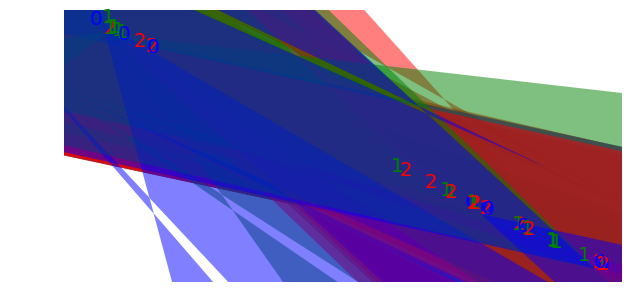

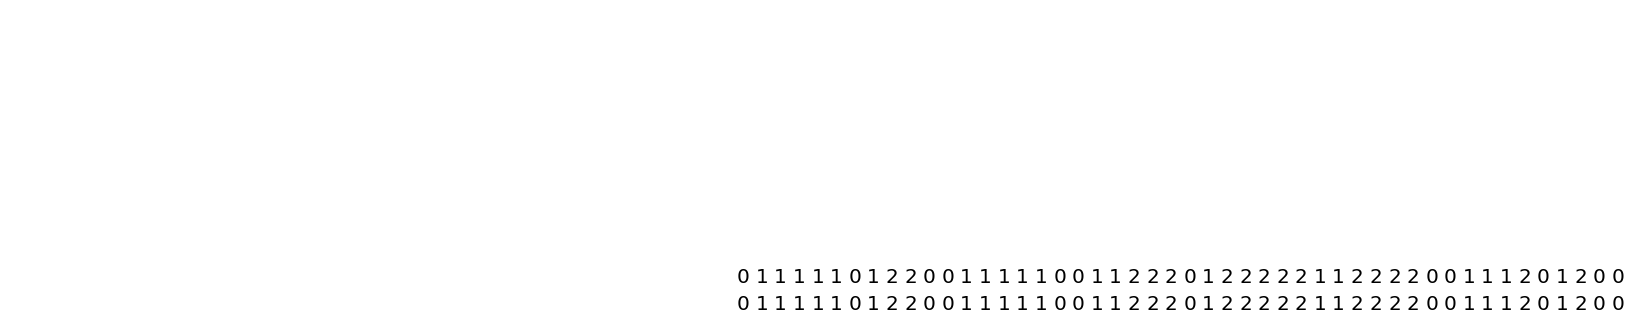

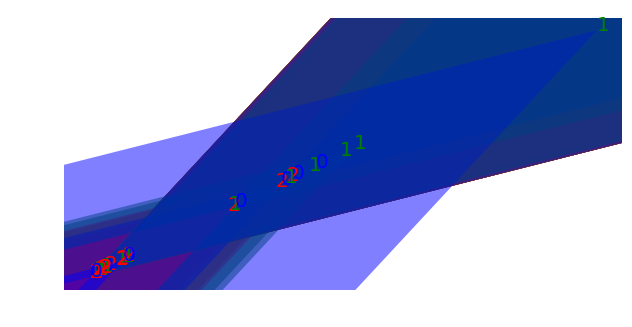

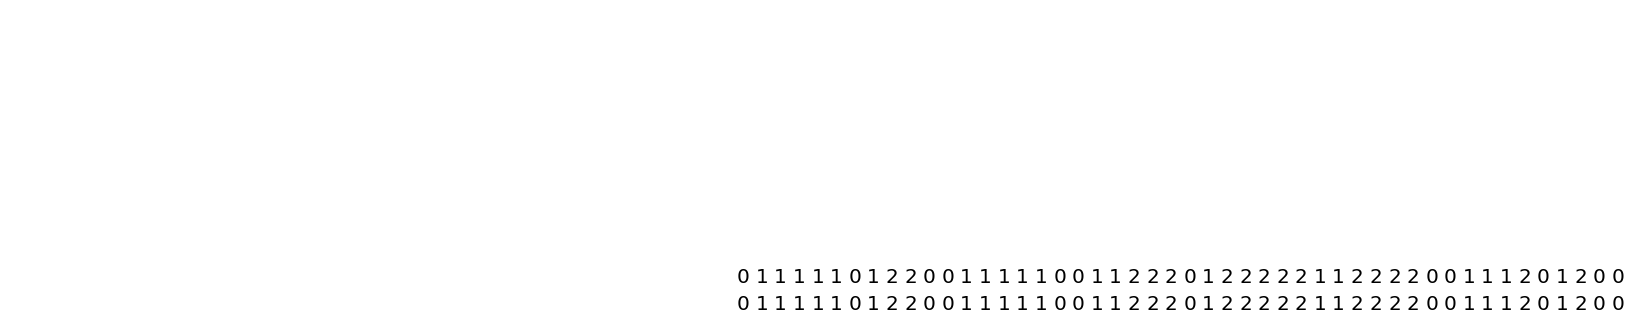

[3 1 1 1 2 0 0 0 0 1 2 0 1 2 2 2 0 1 2 0 0 0 0 0 0 2 2 2 0 1 2 0 1 1 1 1 1
 0 0 1 2 2 2 0 0 0 1 2 0 0 0 0 0 0 2 2 0 1 1 2 2 2 0 1 2 0 0 0 1 1 2 2 0 0
 0 0 1 2 2 2 0 1 2 0 1 2 2 0 0 1 1 1 2 0 0 0 0 1 1 1 1]


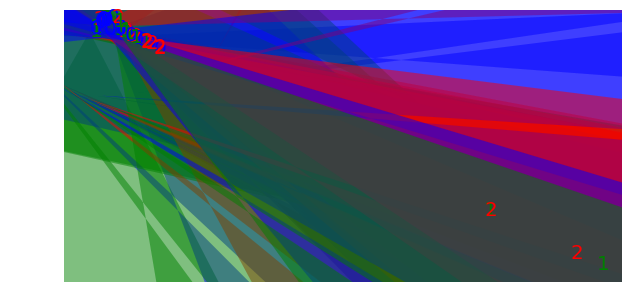

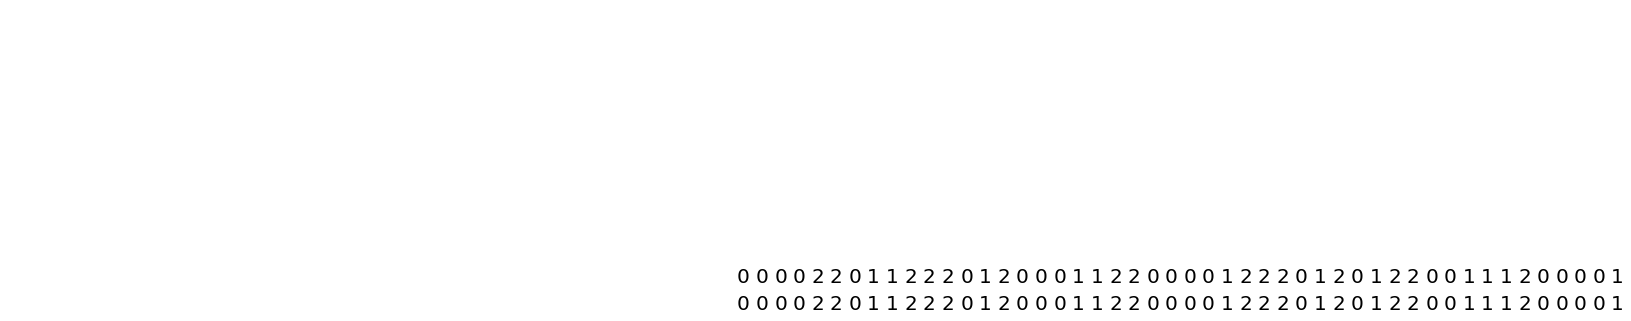

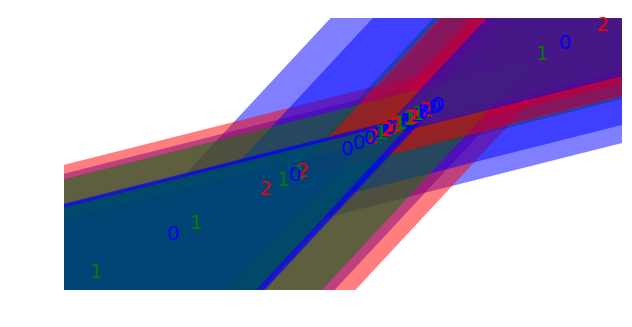

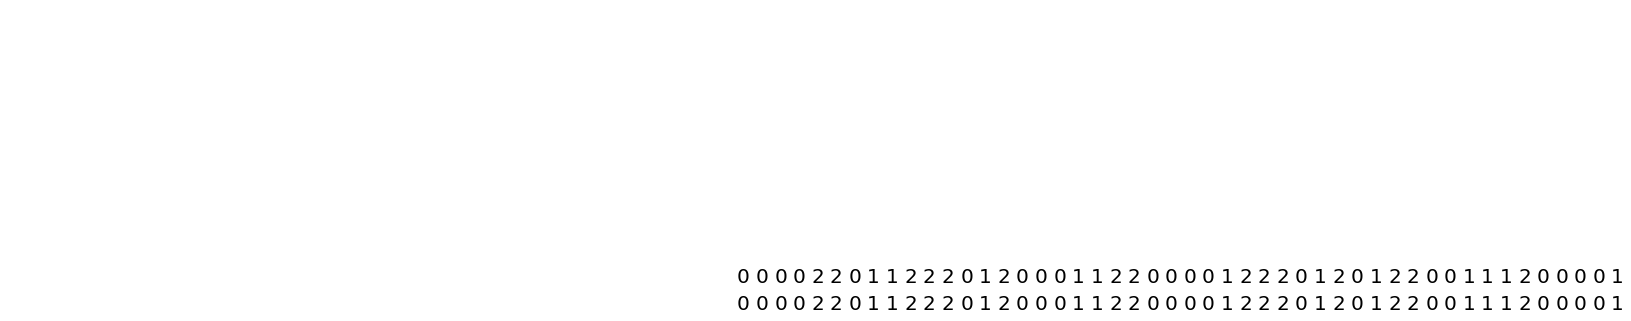

[3 0 0 0 1 2 2 0 0 1 2 0 1 1 2 0 0 1 1 1 1 2 2 2 0 1 1 1 2 2 2 0 1 2 0 1 1
 1 1 1 1 1 1 1 1 0 1 2 0 1 1 1 1 2 0 0 1 1 2 0 0 0 0 1 1 1 2 2 2 0 0 1 1 2
 0 0 1 2 0 1 2 2 2 2 2 2 2 2 2 1 1 2 0 0 1 2 0 1 1 1 2]


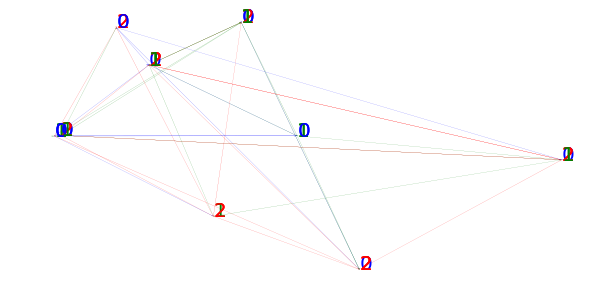

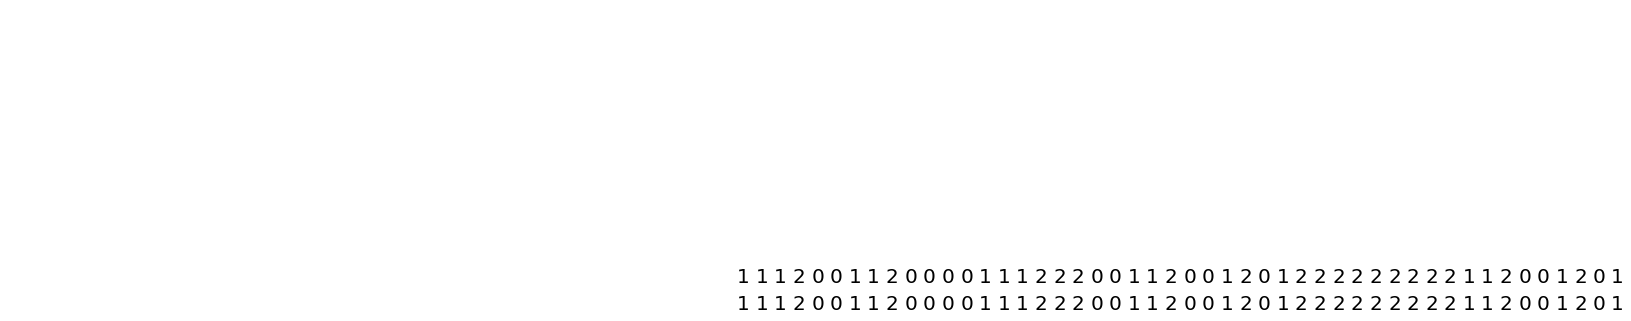

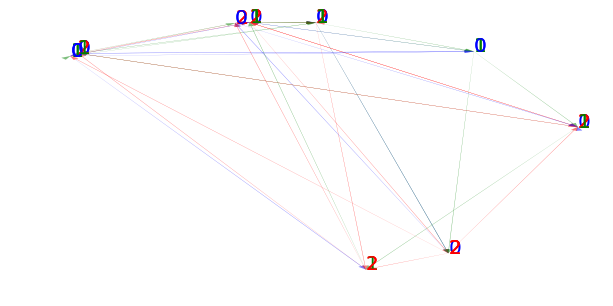

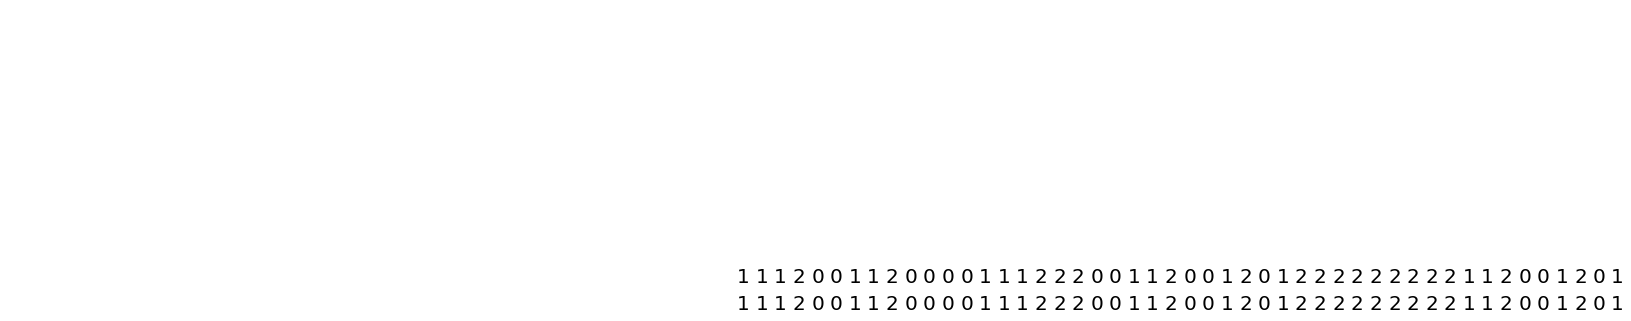

[3 0 0 0 1 1 2 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 2 2 0 1 1 2 2 0 1 1 2 0 0
 1 1 1 2 2 0 1 2 0 1 1 1 1 2 2 0 0 0 1 2 2 2 0 1 1 2 0 0 1 1 2 0 1 2 0 0 0
 1 2 0 0 1 1 2 2 2 2 2 1 2 0 0 1 1 1 1 2 2 2 0 1 1 2 0]


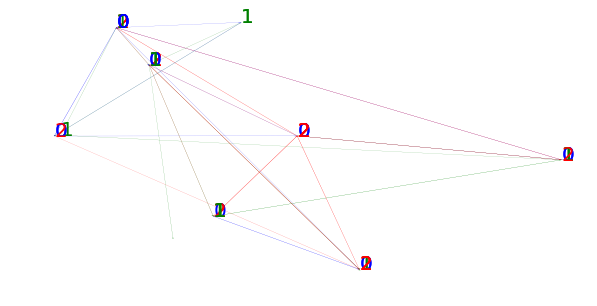

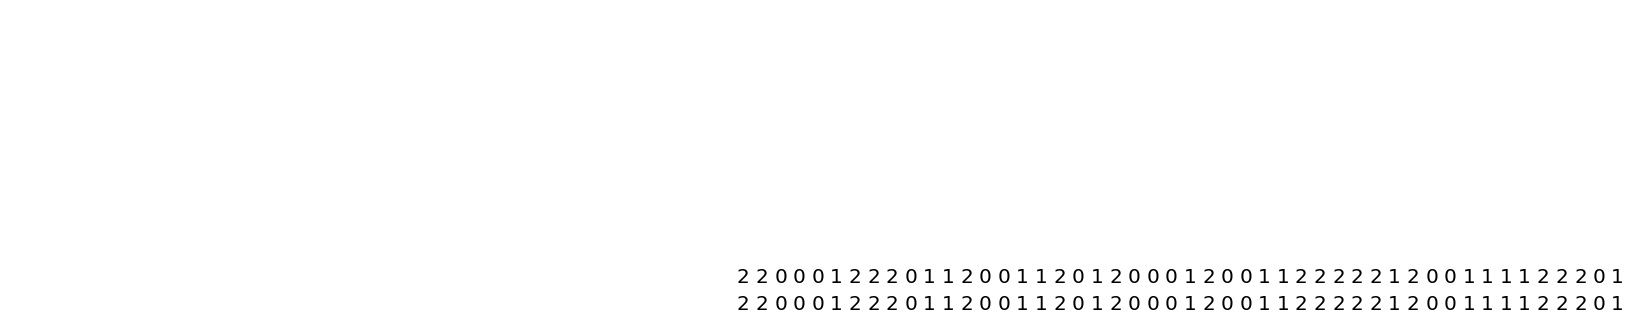

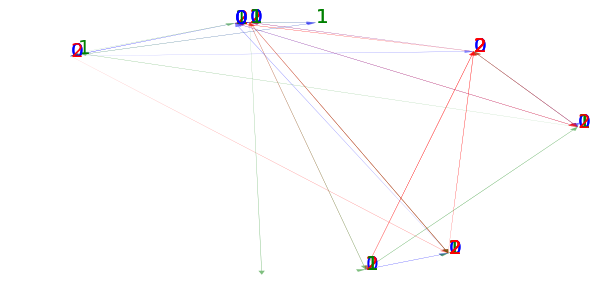

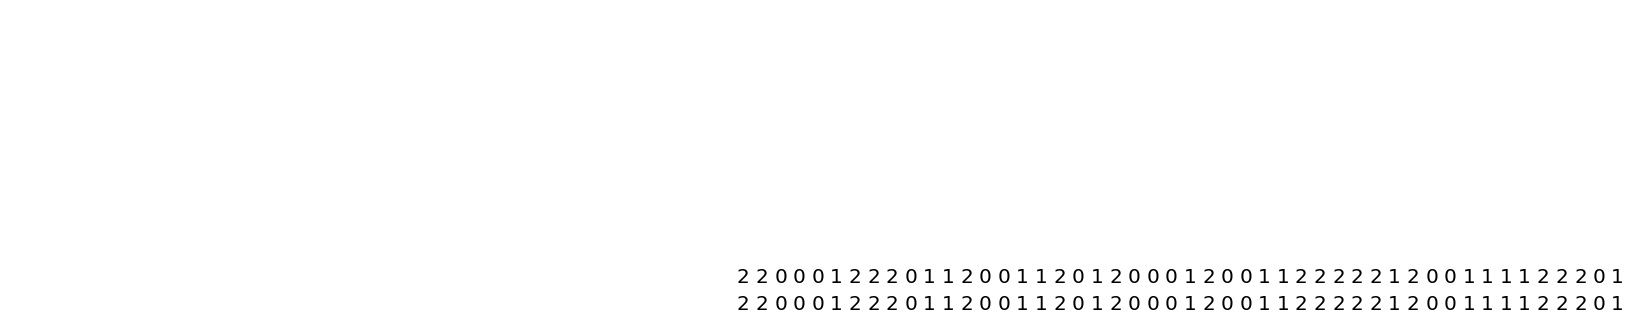

[3 2 2 0 0 1 1 2 0 0 0 1 1 2 2 2 2 0 0 0 0 0 2 2 2 0 0 0 0 1 2 0 1 2 2 2 2
 0 0 1 2 2 2 2 0 0 1 1 2 0 0 0 1 2 2 2 0 1 1 2 0 0 0 0 1 2 0 0 0 1 2 0 0 0
 1 1 1 1 1 1 0 0 0 0 0 2 0 0 1 1 2 2 2 2 2 2 2 1 2 0 0]


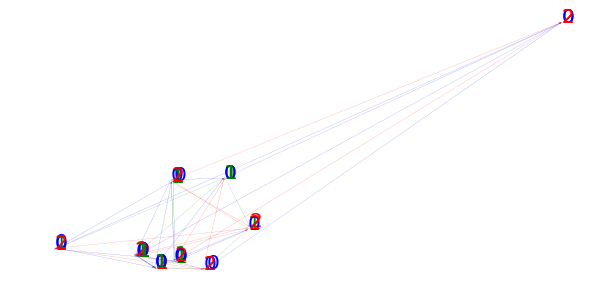

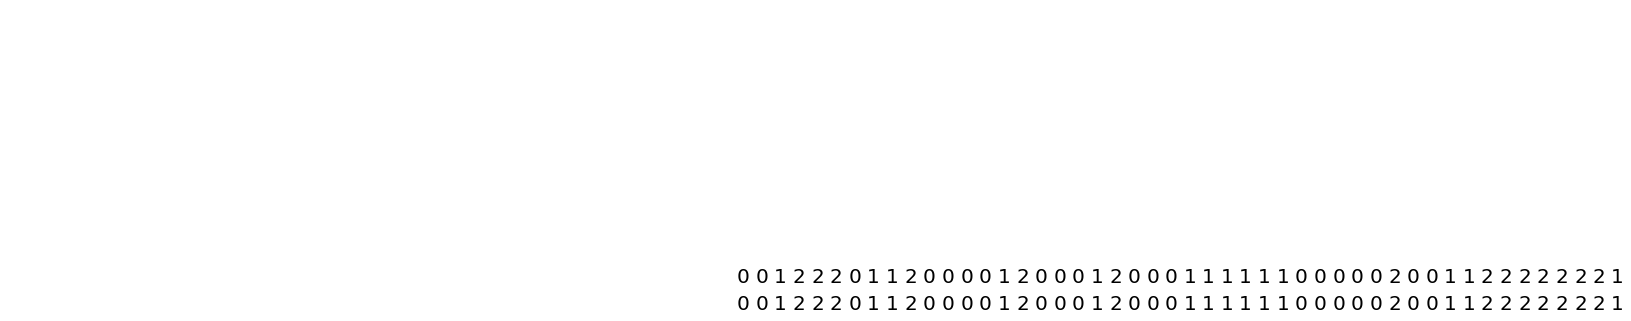

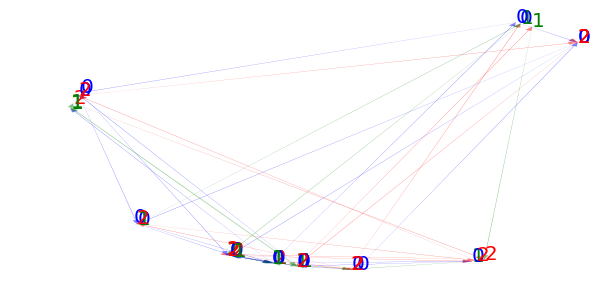

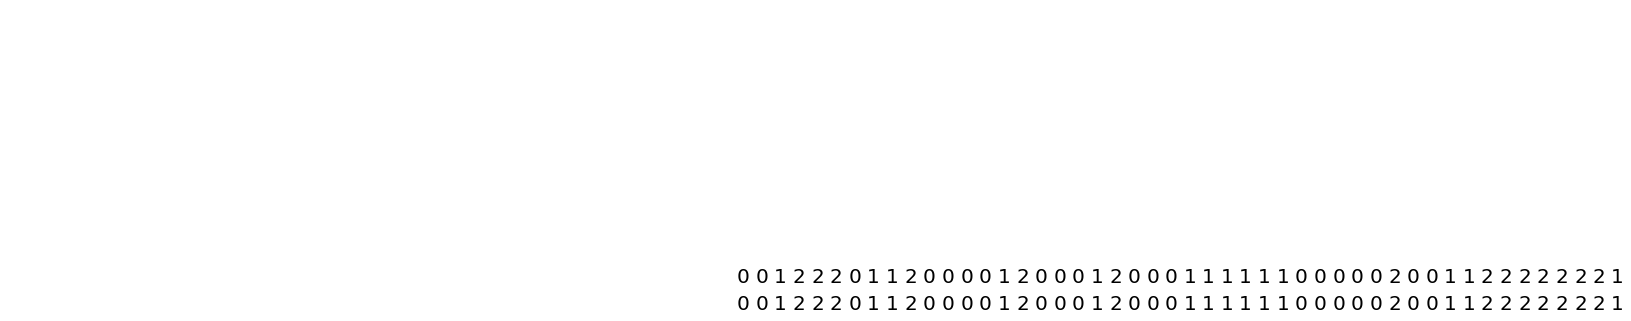

[3 1 1 2 0 1 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0 0 1 2 0 0 0 1 2 0 0 1 1 2 2 2 2
 2 1 1 2 0 1 2 0 1 2 0 0 0 0 1 2 2 0 0 1 1 2 0 1 2 2 2 0 1 2 0 0 0 0 0 2 2
 2 0 1 2 2 0 1 1 2 2 0 0 1 2 2 0 1 1 1 1 1 0 1 2 2 2 0]


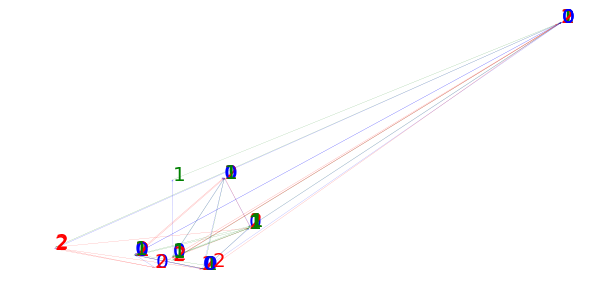

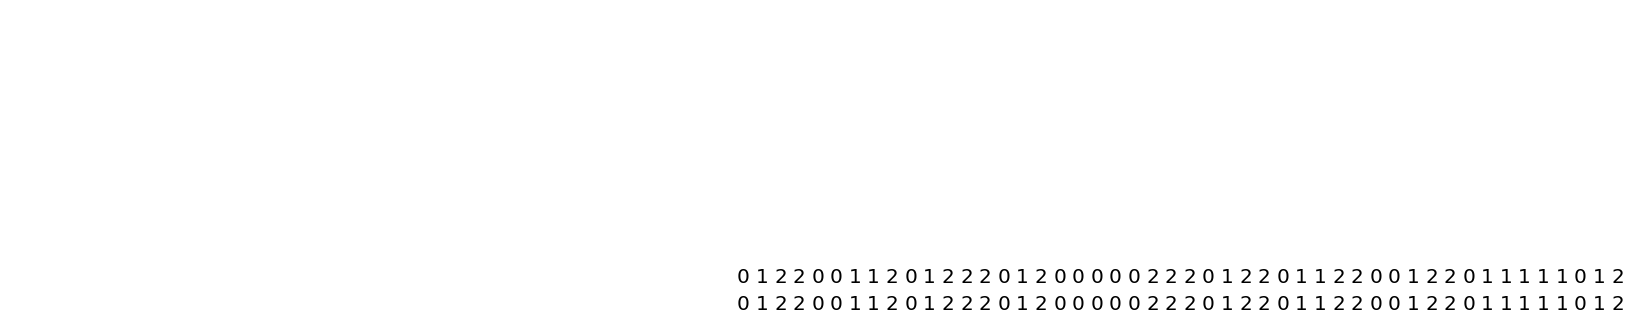

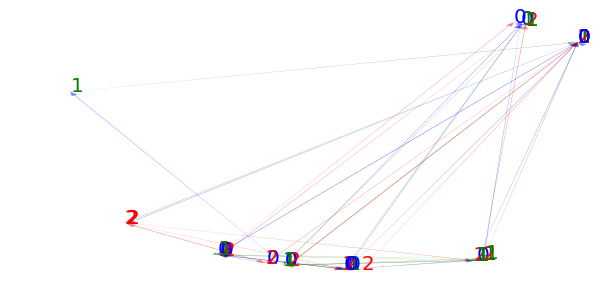

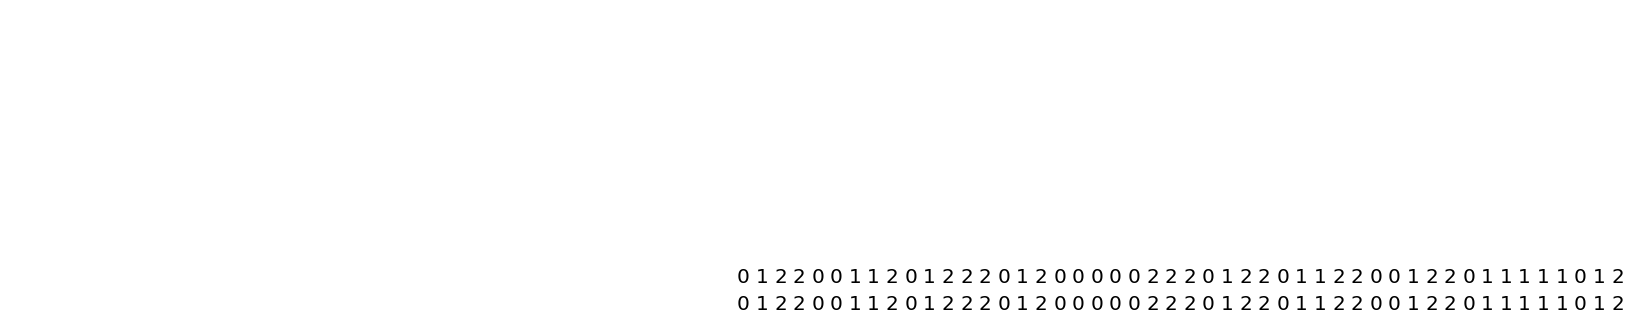

[3 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 0 1 1 2 0 1 1 2 0 1 1 2 2 0 0 1 1 1 1
 1 0 1 1 1 1 2 2 2 0 0 1 2 2 0 1 1 1 1 2 0 0 1 1 1 1 2 2 0 0 1 2 2 2 2 2 1
 2 0 1 1 2 2 0 0 1 1 2 2 2 0 1 2 0 1 2 2 0 0 1 2 0 1 1]


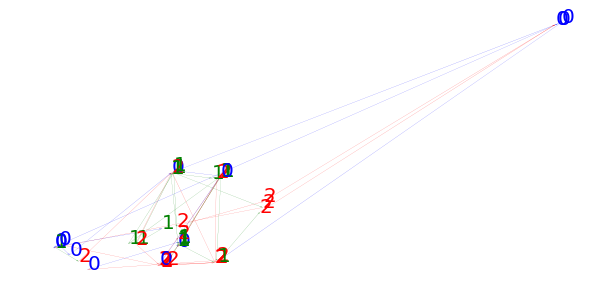

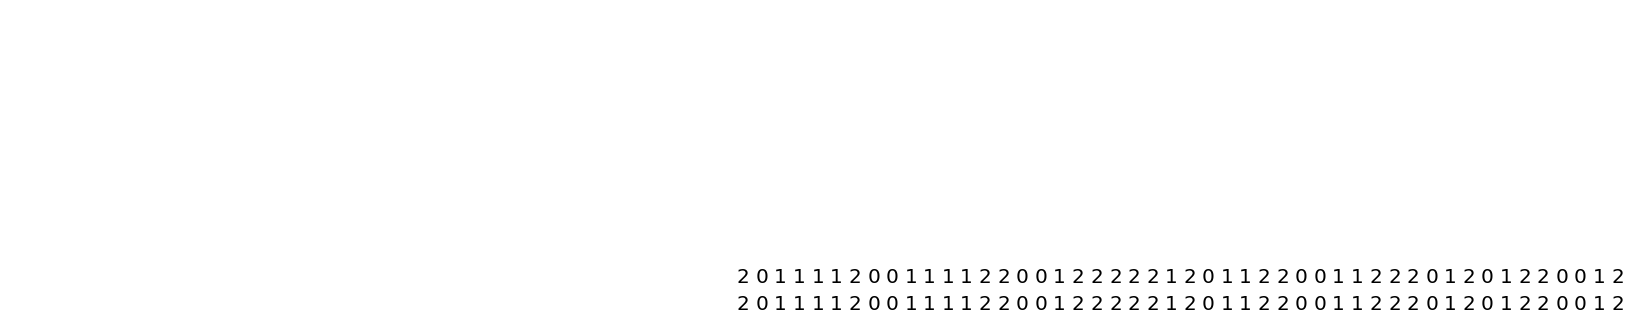

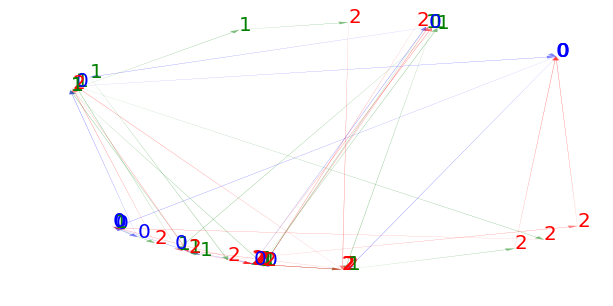

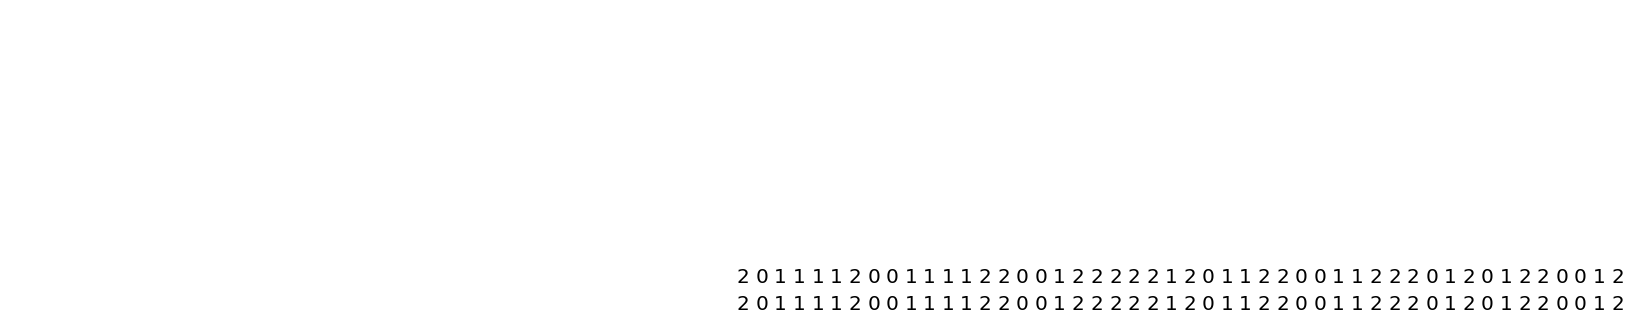

[3 1 1 1 2 2 2 2 0 0 1 2 0 0 0 1 2 2 0 0 1 2 0 0 0 0 1 2 0 1 2 2 0 0 1 2 2
 2 0 1 2 2 2 2 0 0 1 2 2 2 0 0 0 0 1 1 2 2 0 0 0 1 1 2 0 0 0 0 0 2 0 0 1 1
 1 1 1 0 1 2 0 1 1 2 2 0 1 2 0 0 1 2 0 1 2 0 1 2 0 0 1]


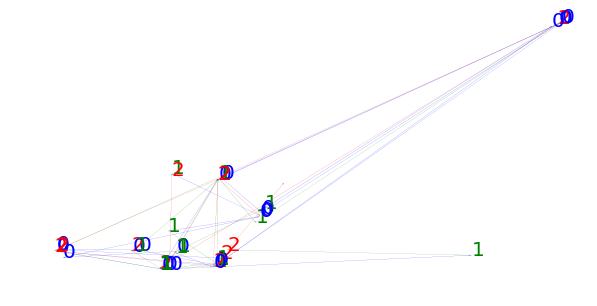

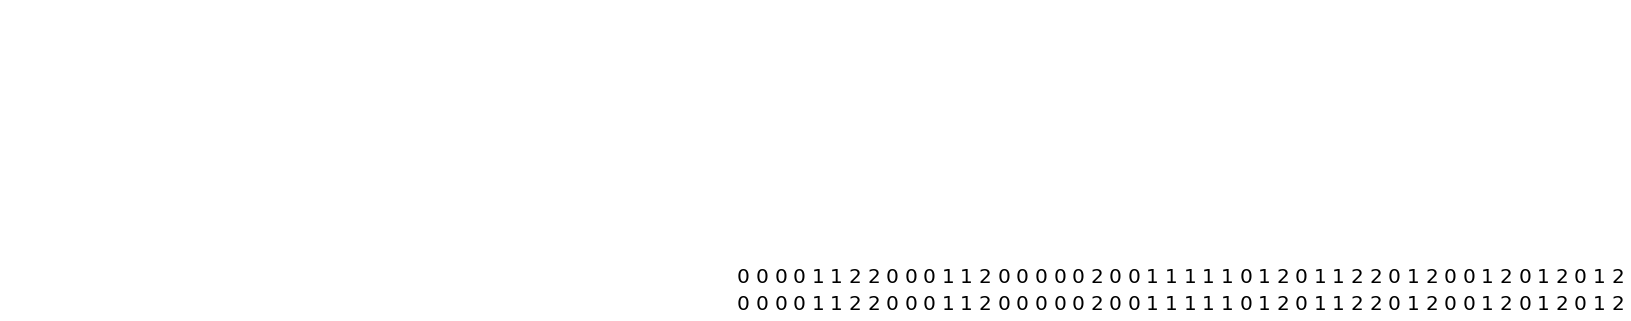

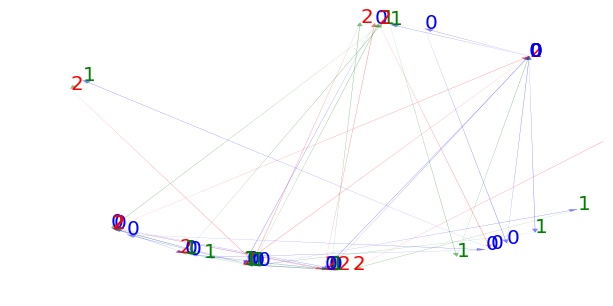

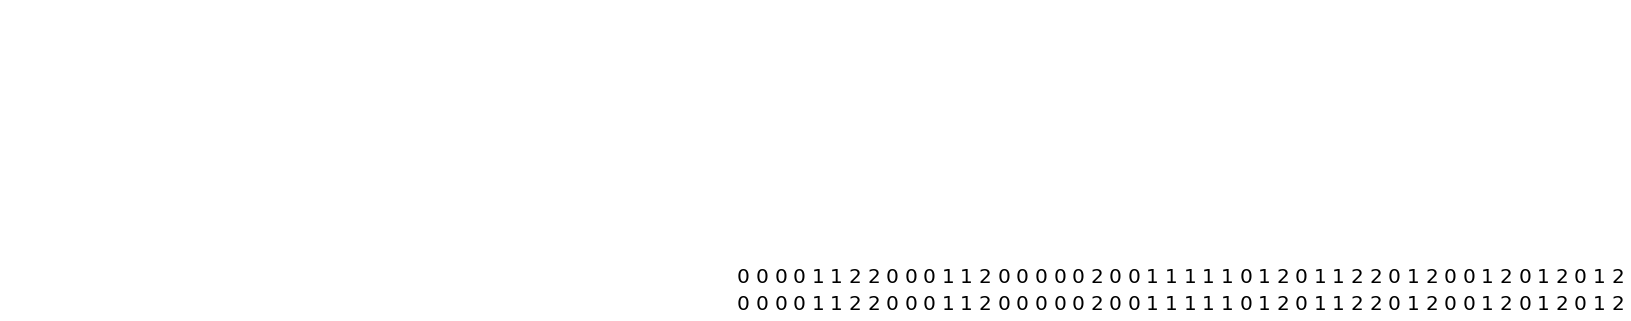

[3 1 1 1 2 0 1 1 1 1 2 0 1 1 1 1 2 2 2 0 1 1 2 0 1 2 0 0 1 1 2 2 0 0 1 2 2
 0 1 1 2 0 1 1 2 2 0 1 1 1 1 1 1 0 0 1 1 2 0 0 0 0 1 1 2 0 1 2 0 0 0 1 2 2
 0 0 0 1 1 1 2 0 0 0 1 1 1 2 2 0 0 1 2 0 1 1 1 2 2 0 0]


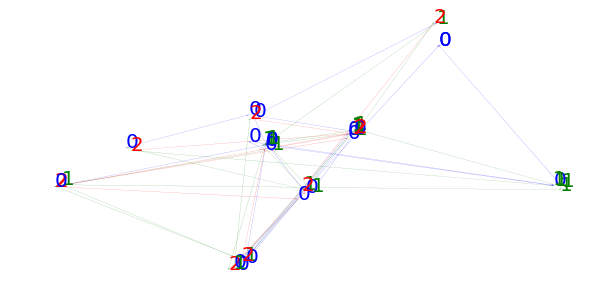

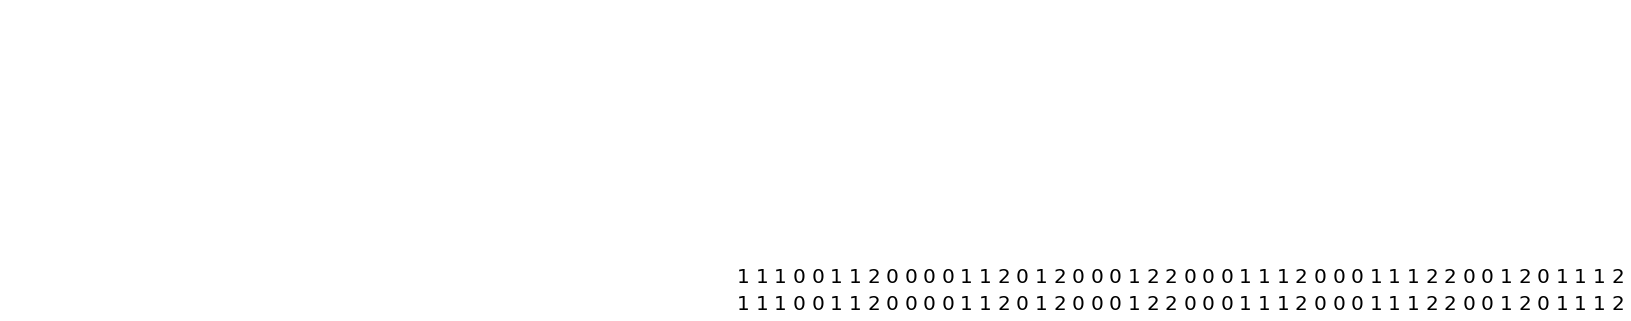

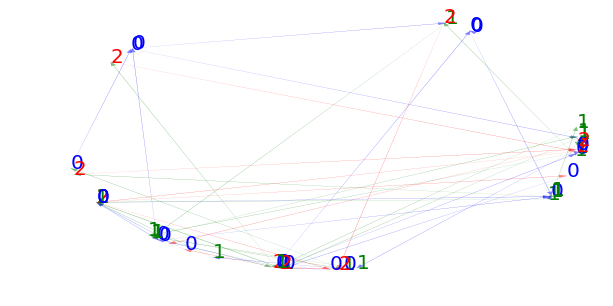

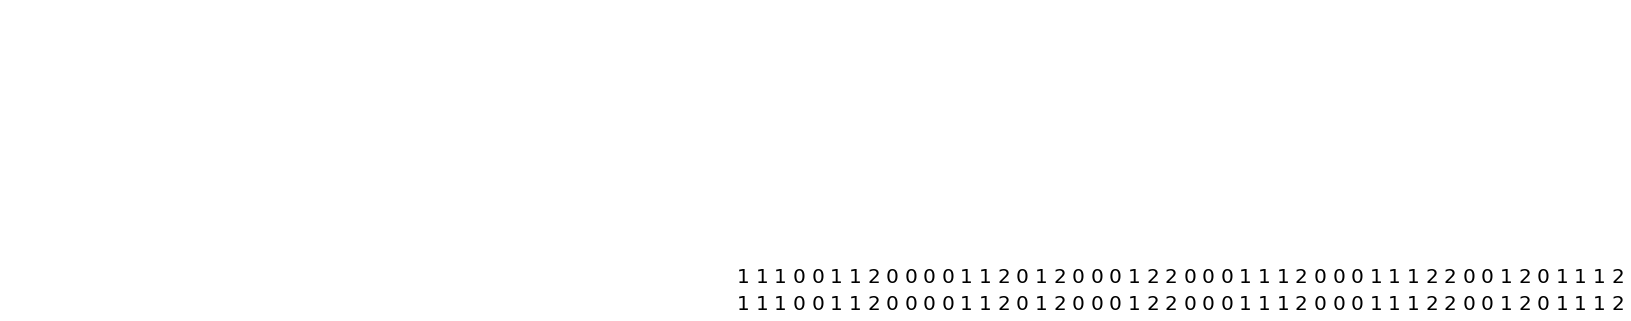

[3 0 0 1 2 2 2 0 1 2 0 1 1 2 2 2 0 0 0 0 0 2 2 0 0 0 1 1 2 2 2 2 0 1 1 2 0
 1 1 1 1 1 0 1 1 2 0 0 1 2 0 1 1 2 0 0 1 2 0 0 0 1 2 0 1 1 2 2 2 0 1 1 1 1
 1 0 1 1 1 2 0 0 1 2 2 0 0 0 0 0 0 2 0 1 2 0 0 0 0 1 1]


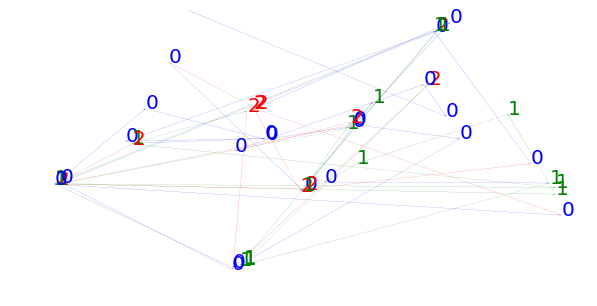

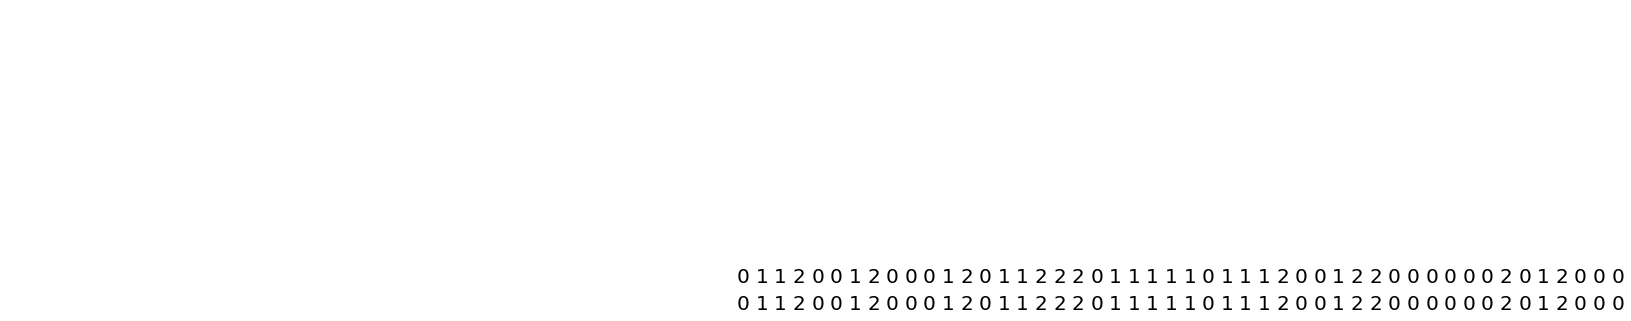

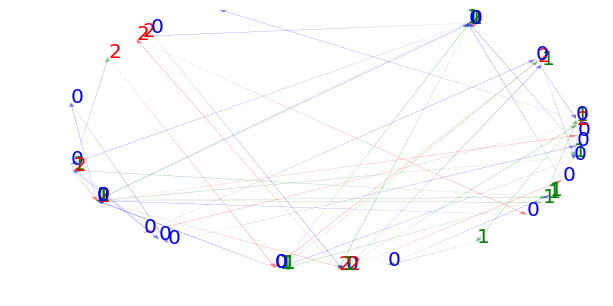

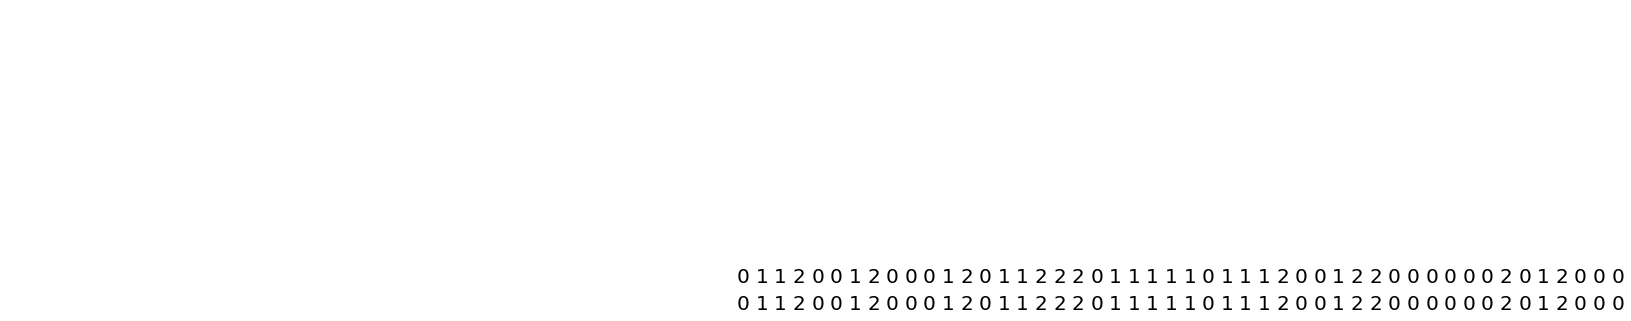

In [32]:
### Adapting Lihan's plots


def PlotSample(sample, pred_symbols, pred_states, vec_projected):
    plt.gcf().set_size_inches(10, 5)
    for i in range(50, 98):#num_symbols-1):
        x, y = vec_projected[i,0], vec_projected[i,1] 
        plt.plot(x,y, '-')
        next_x, next_y = vec_projected[i+1,0], vec_projected[i+1,1] 
        plt.text(x, y, '%d'%(pred_symbols[i]), fontsize=20, color = colors[sample[i]])
#         plt.annotate(str(pred_symbols[i]), (x,y), fontsize=20)
        plt.arrow(x, y, next_x - x, next_y - y, 
                  color = colors[sample[i]], alpha= 0.5,
                  shape='full', lw=0.1, length_includes_head=True, head_width=.02)
        

    plt.axis('off')
#     plt.ylim(-0.6, 0.6)
#     plt.xlim(-0.4, 0.6)
    plt.savefig(save_path+'imgs/'+''.join([str(x) for x in sample])+'_tsne_200_samples.png')
    plt.show()
    # write out predicted sequence and actual sequence at the bottom 
    plt.gcf().set_size_inches(10, 5)
    plt.axis('off')
    for i in range(50, 98):#num_symbols-1):
        truth_color = 'black'
        if sample[i] != pred_symbols[i]:
            truth_color = 'red'
        plt.text( i/30-0.4, -.1, '%d'%(sample[i]), fontsize=20, color = truth_color)
        plt.text( i/30-0.4, -0.0, '%d'%(pred_symbols[i]), fontsize=20)#, color = colors[pred_states[i]])
    plt.savefig(save_path+'imgs/'+''.join([str(x) for x in sample])+'_tsne_200_samples_sequences.png')
    plt.show()
    return



pca = PCA(n_components = 2)
colors = ['blue', 'green', 'red', 'cyan', 'brown', 'grey', 'orange', 'black', 'purple', 'olive']

# two_dim_Z = pca.fit_transform(hiddens[:,1:200,:].reshape(-1, 46))
# two_dim_Z = two_dim_Z.reshape(-1, 100, 2)
# print(two_dim_Z.shape)

indexes_to_test = [x for x in range(100)]
for i in range(10):
    print(reals[indexes_to_test[i]])
    PlotSample(reals[indexes_to_test[i]], preds[indexes_to_test[i],:], None, two_dim_Z[i])
    plt.show()
    PlotSample(reals[indexes_to_test[i]], preds[indexes_to_test[i],:], None, normalize(two_dim_Z[i]))


(199, 100, 2)
[3 0 0 0 1 1 2 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 2 2 0 1 1 2 2 0 1 1 2 0 0
 1 1 1 2 2 0 1 2 0 1 1 1 1 2 2 0 0 0 1 2 2 2 0 1 1 2 0 0 1 1 2 0 1 2 0 0 0
 1 2 0 0 1 1 2 2 2 2 2 1 2 0 0 1 1 1 1 2 2 2 0 1 1 2 0]


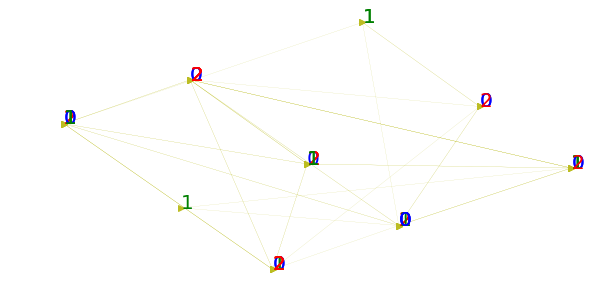

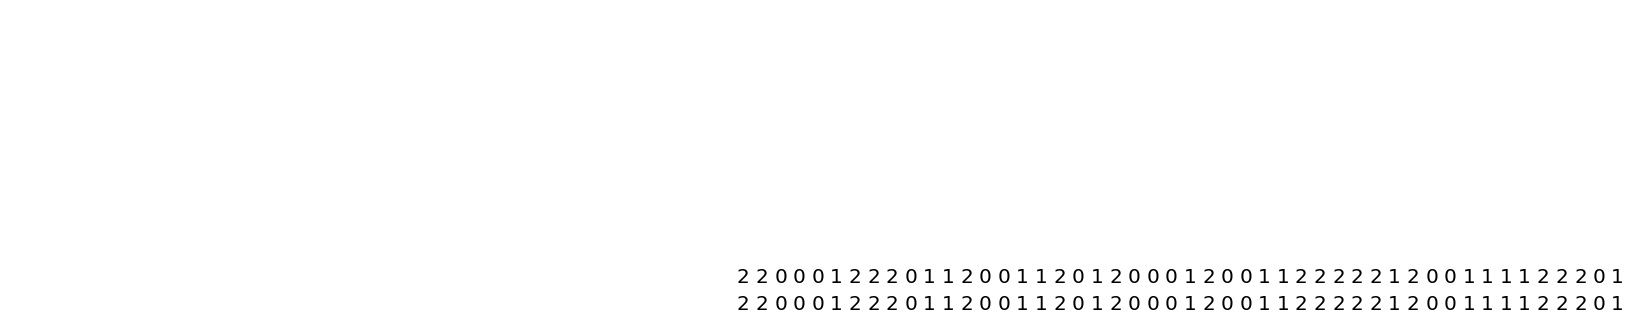

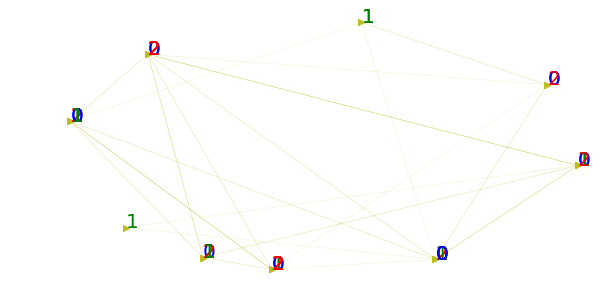

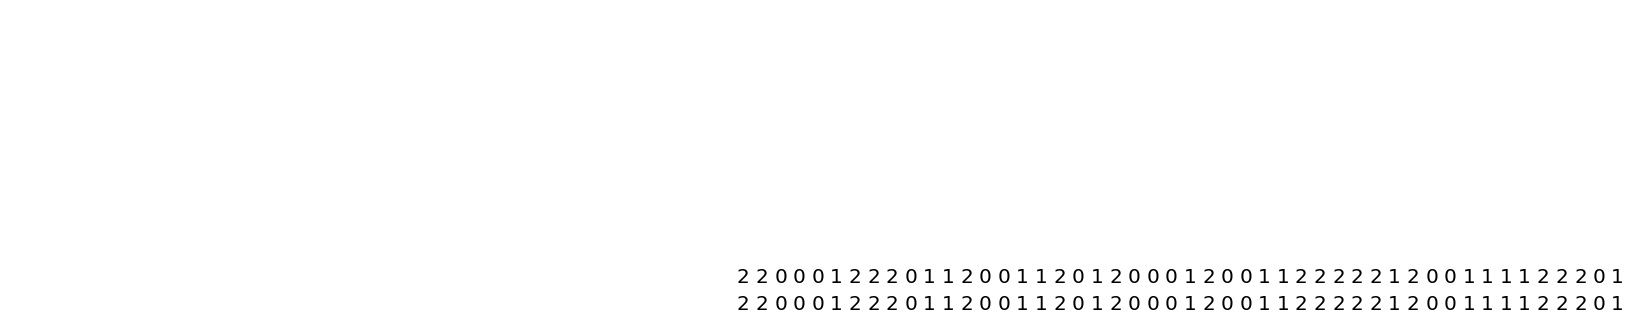

[3 2 2 0 0 1 1 2 0 0 0 1 1 2 2 2 2 0 0 0 0 0 2 2 2 0 0 0 0 1 2 0 1 2 2 2 2
 0 0 1 2 2 2 2 0 0 1 1 2 0 0 0 1 2 2 2 0 1 1 2 0 0 0 0 1 2 0 0 0 1 2 0 0 0
 1 1 1 1 1 1 0 0 0 0 0 2 0 0 1 1 2 2 2 2 2 2 2 1 2 0 0]


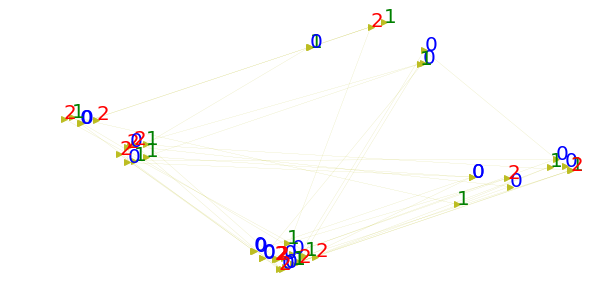

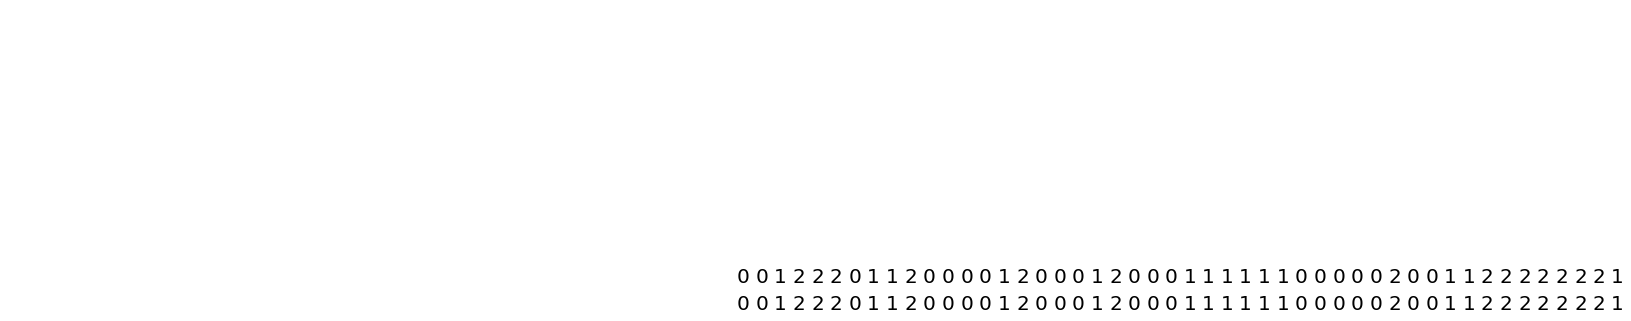

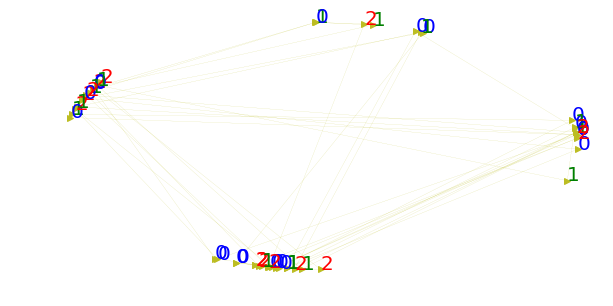

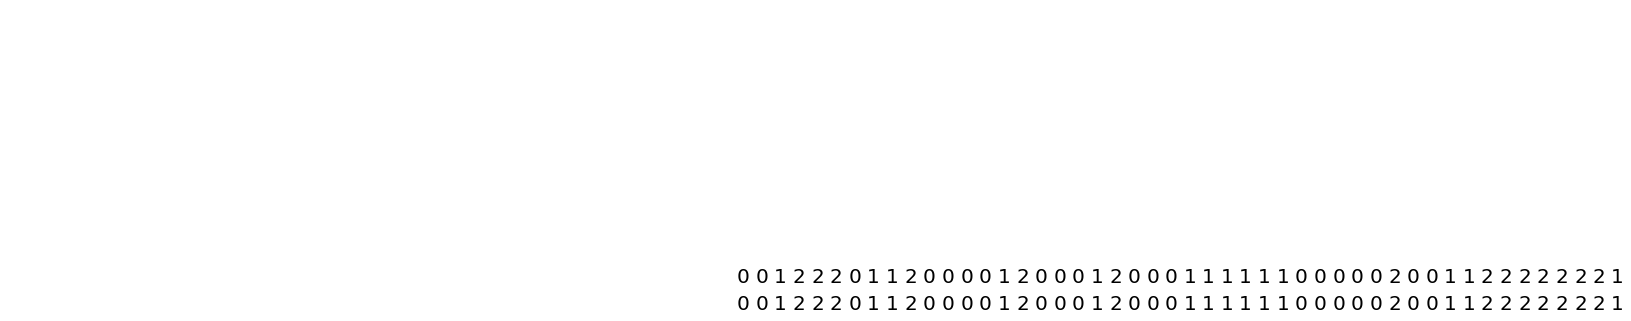

[3 1 1 2 0 1 2 2 2 2 2 2 1 1 1 1 1 1 1 0 0 0 1 2 0 0 0 1 2 0 0 1 1 2 2 2 2
 2 1 1 2 0 1 2 0 1 2 0 0 0 0 1 2 2 0 0 1 1 2 0 1 2 2 2 0 1 2 0 0 0 0 0 2 2
 2 0 1 2 2 0 1 1 2 2 0 0 1 2 2 0 1 1 1 1 1 0 1 2 2 2 0]


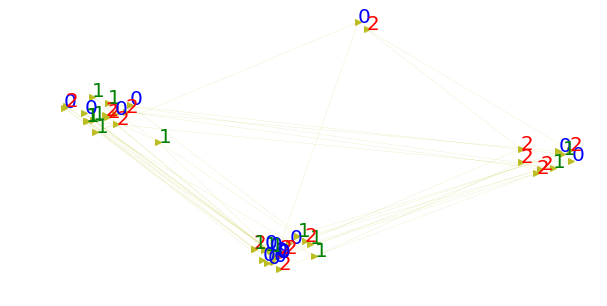

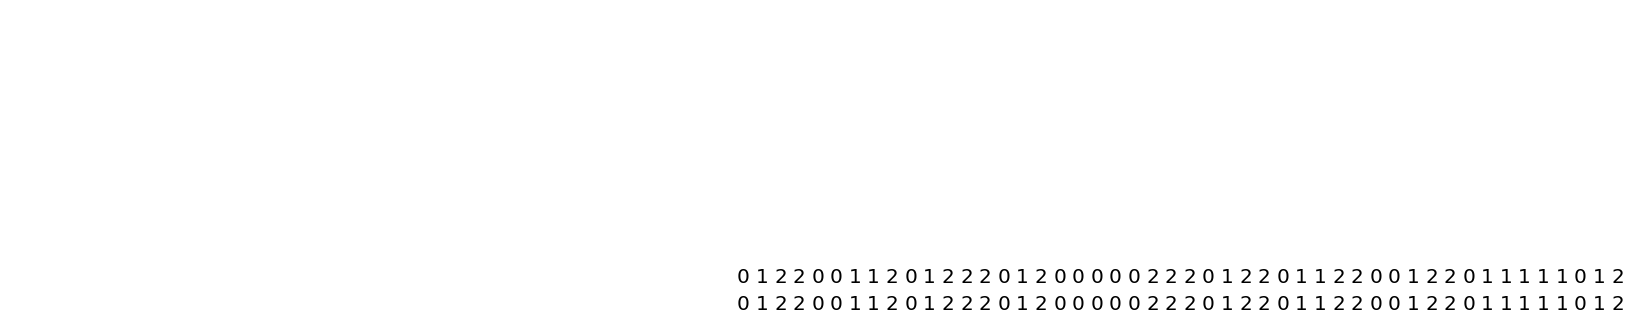

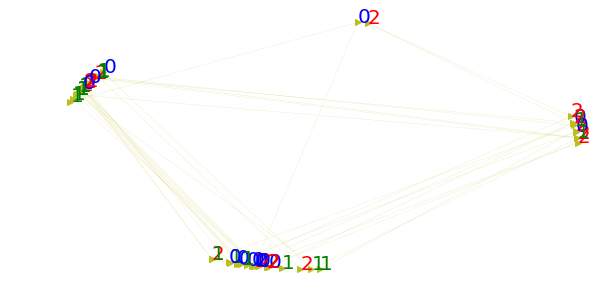

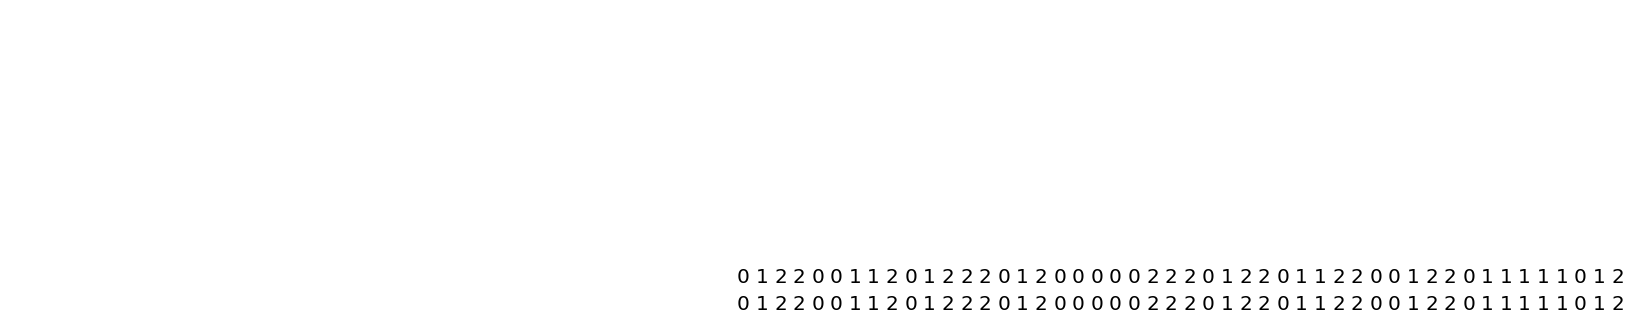

[3 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 0 1 1 2 0 1 1 2 0 1 1 2 2 0 0 1 1 1 1
 1 0 1 1 1 1 2 2 2 0 0 1 2 2 0 1 1 1 1 2 0 0 1 1 1 1 2 2 0 0 1 2 2 2 2 2 1
 2 0 1 1 2 2 0 0 1 1 2 2 2 0 1 2 0 1 2 2 0 0 1 2 0 1 1]


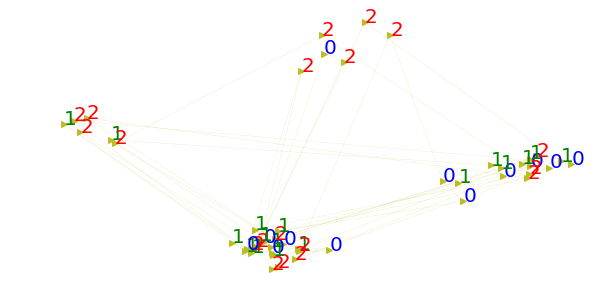

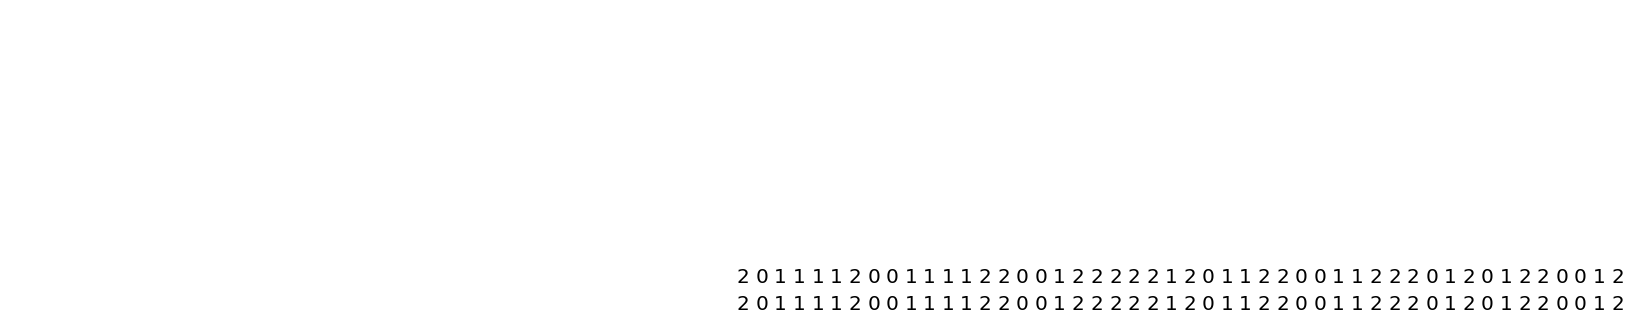

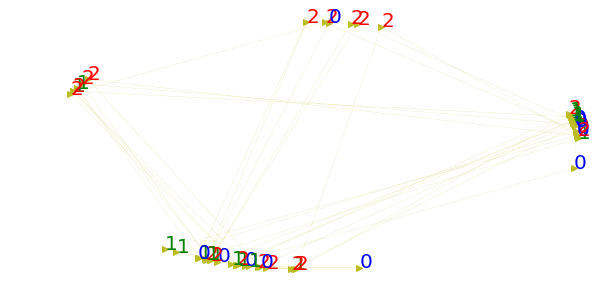

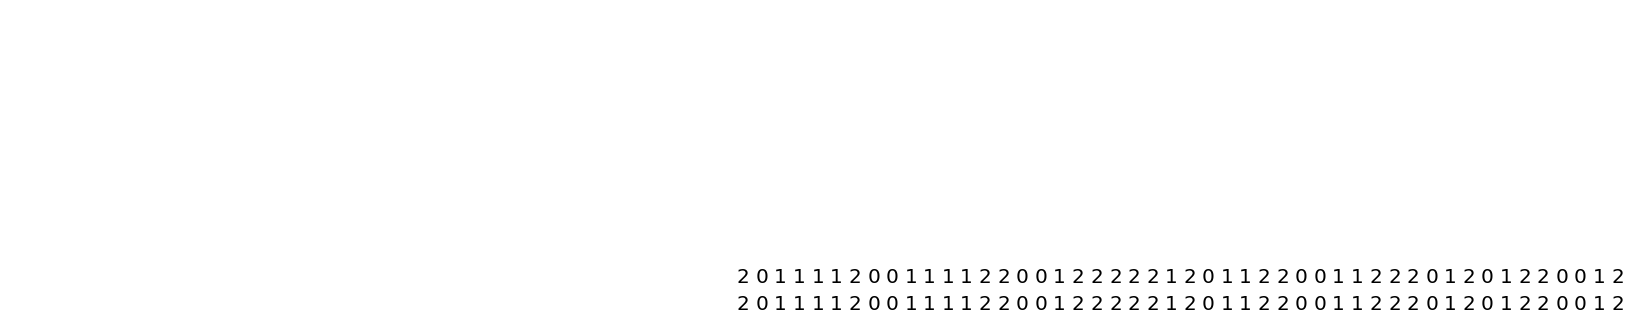

[3 1 1 1 2 2 2 2 0 0 1 2 0 0 0 1 2 2 0 0 1 2 0 0 0 0 1 2 0 1 2 2 0 0 1 2 2
 2 0 1 2 2 2 2 0 0 1 2 2 2 0 0 0 0 1 1 2 2 0 0 0 1 1 2 0 0 0 0 0 2 0 0 1 1
 1 1 1 0 1 2 0 1 1 2 2 0 1 2 0 0 1 2 0 1 2 0 1 2 0 0 1]


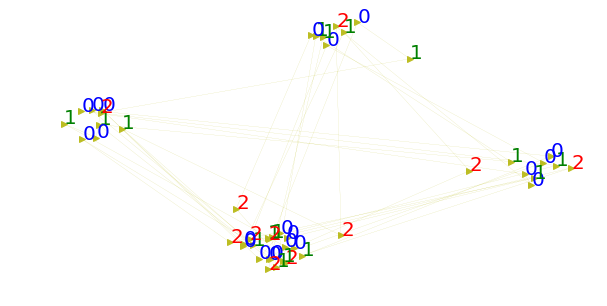

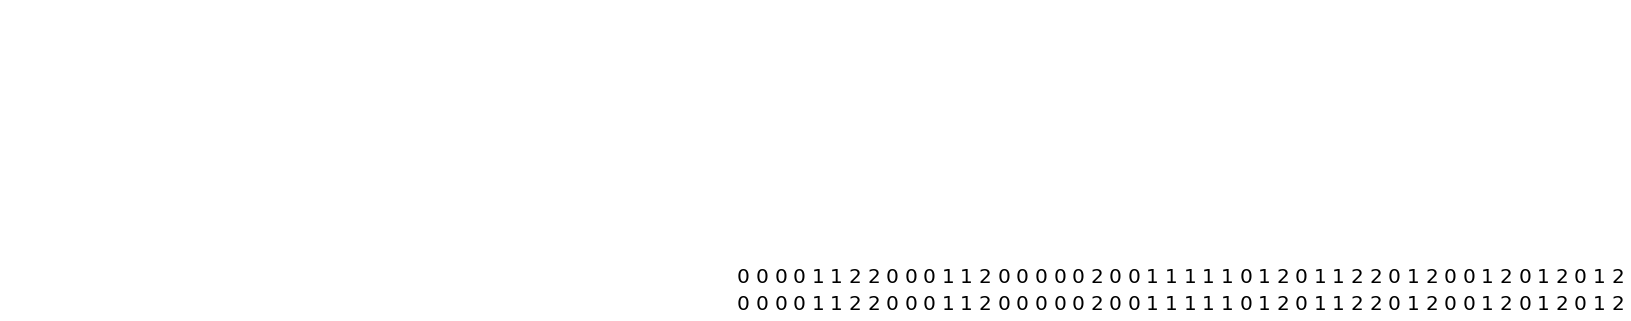

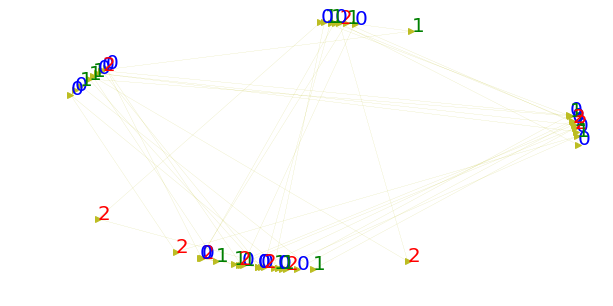

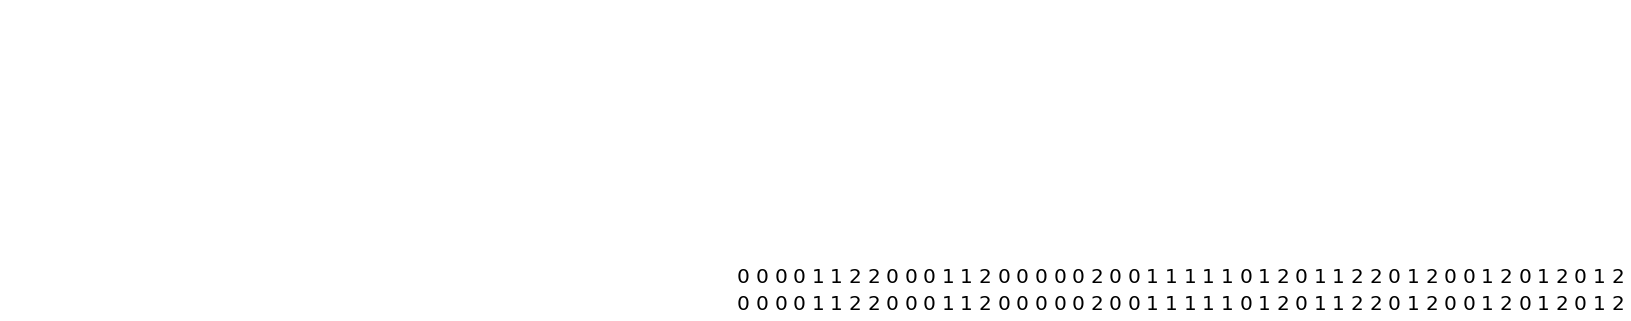

[3 1 1 1 2 0 1 1 1 1 2 0 1 1 1 1 2 2 2 0 1 1 2 0 1 2 0 0 1 1 2 2 0 0 1 2 2
 0 1 1 2 0 1 1 2 2 0 1 1 1 1 1 1 0 0 1 1 2 0 0 0 0 1 1 2 0 1 2 0 0 0 1 2 2
 0 0 0 1 1 1 2 0 0 0 1 1 1 2 2 0 0 1 2 0 1 1 1 2 2 0 0]


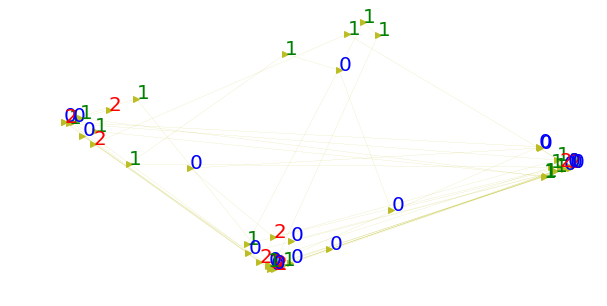

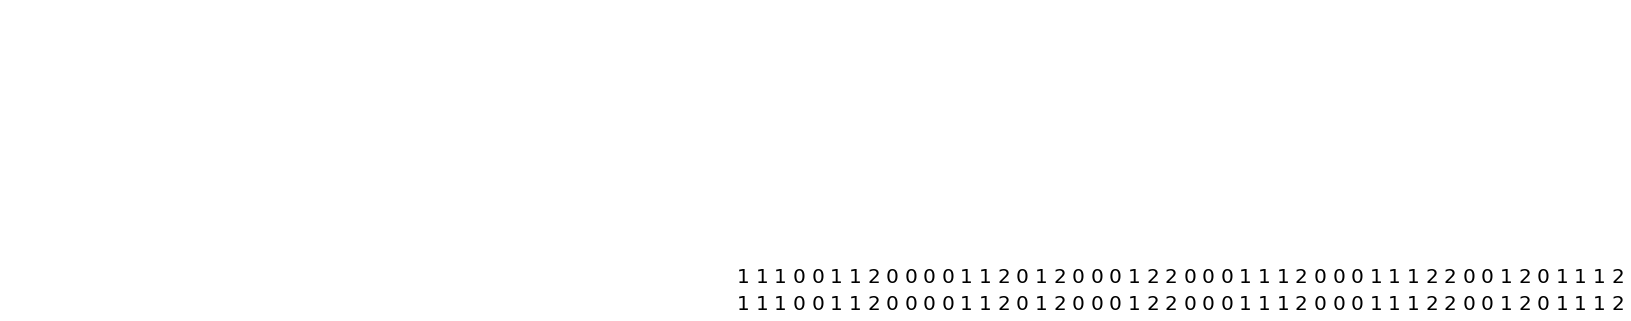

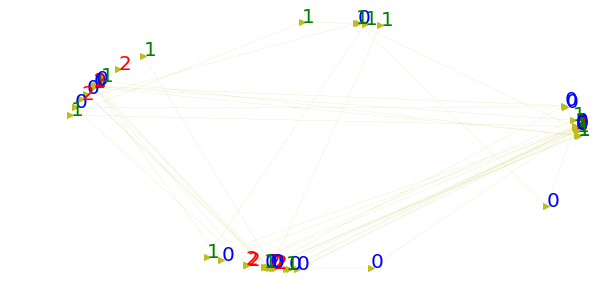

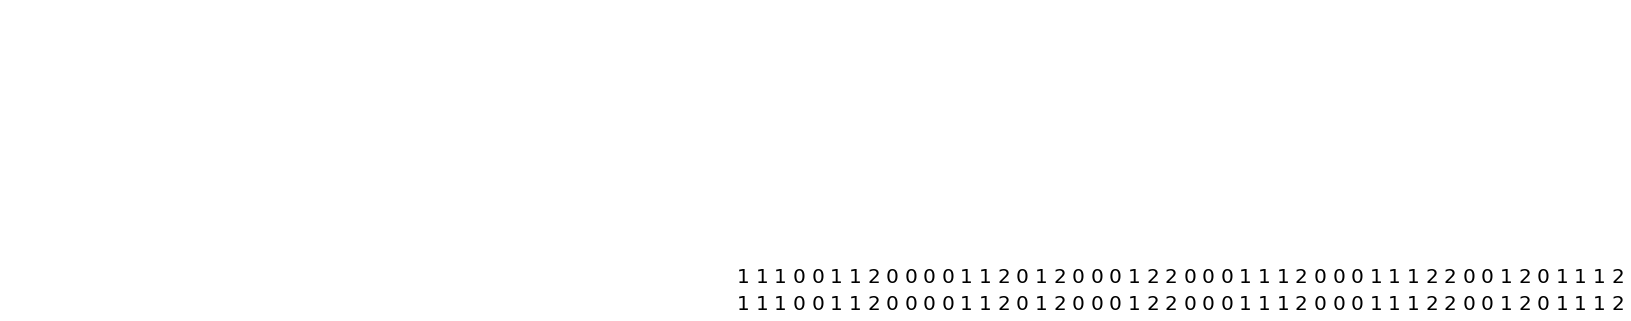

[3 0 0 1 2 2 2 0 1 2 0 1 1 2 2 2 0 0 0 0 0 2 2 0 0 0 1 1 2 2 2 2 0 1 1 2 0
 1 1 1 1 1 0 1 1 2 0 0 1 2 0 1 1 2 0 0 1 2 0 0 0 1 2 0 1 1 2 2 2 0 1 1 1 1
 1 0 1 1 1 2 0 0 1 2 2 0 0 0 0 0 0 2 0 1 2 0 0 0 0 1 1]


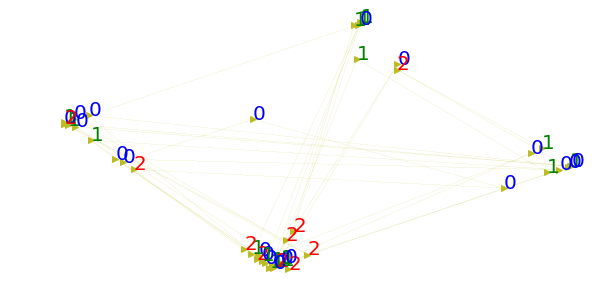

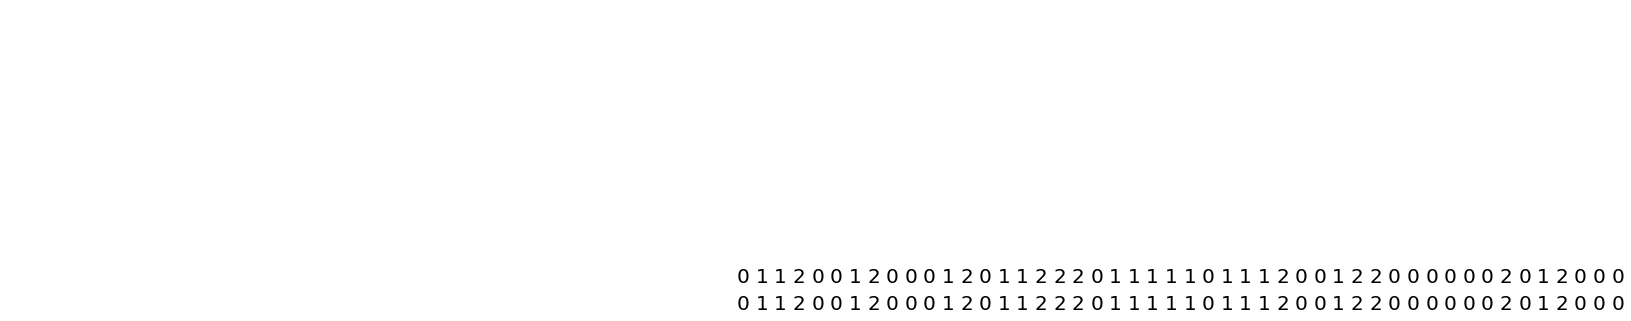

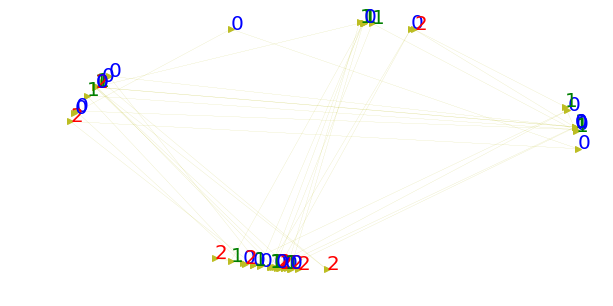

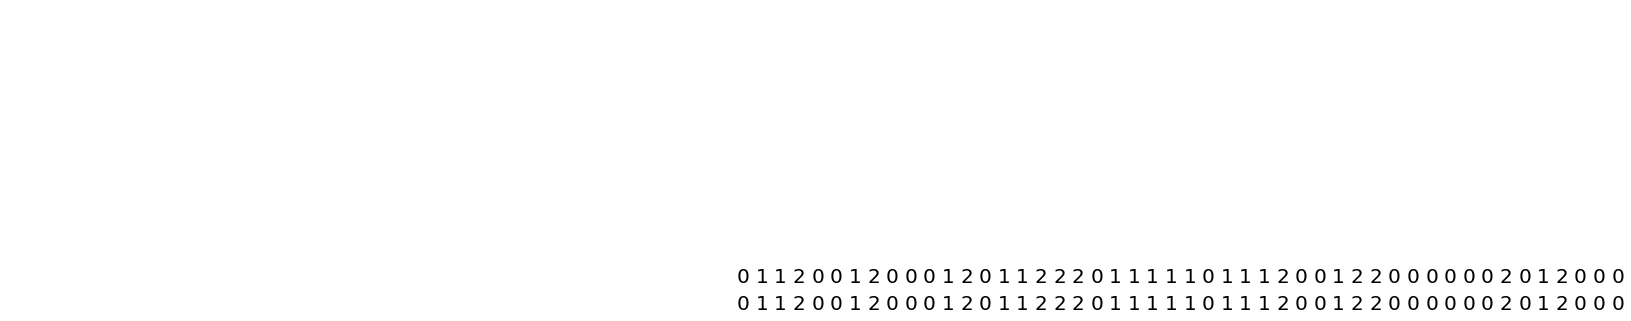

In [107]:
### Adapting Lihan's plots


def PlotSample(sample, pred_symbols, pred_states, vec_projected):
    plt.gcf().set_size_inches(10, 5)
    
    overall_plot_x = []
    overall_plot_y = []
    for i in range(50, 98):#num_symbols-1):
        x, y = vec_projected[i,0], vec_projected[i,1] 
        overall_plot_x.append(x)
        overall_plot_y.append(y)
        plt.plot(x,y, '-')
        next_x, next_y = vec_projected[i+1,0], vec_projected[i+1,1] 
        plt.text(x, y, '%d'%(pred_symbols[i]), fontsize=20, color = colors[sample[i]])
#         plt.annotate(str(pred_symbols[i]), (x,y), fontsize=20)
#         plt.arrow(x, y, next_x - x, next_y - y, 
#                   color = colors[sample[i]], alpha= 0.5,
#                   shape='full', lw=0.1, length_includes_head=True, head_width=.02)
        
    plt.plot(overall_plot_x, overall_plot_y, '->', lw=0.1)
    plt.axis('off')
#     plt.ylim(-0.6, 0.6)
#     plt.xlim(-0.4, 0.6)
    plt.savefig(save_path+'imgs/'+''.join([str(x) for x in sample])+'_tsne_200_samples.png')
    plt.show()
    # write out predicted sequence and actual sequence at the bottom 
    plt.gcf().set_size_inches(10, 5)
    plt.axis('off')
    for i in range(50, 98):#num_symbols-1):
        truth_color = 'black'
        if sample[i] != pred_symbols[i]:
            truth_color = 'red'
        plt.text( i/30-0.4, -.1, '%d'%(sample[i]), fontsize=20, color = truth_color)
        plt.text( i/30-0.4, -0.0, '%d'%(pred_symbols[i]), fontsize=20)#, color = colors[pred_states[i]])
    plt.savefig(save_path+'imgs/'+''.join([str(x) for x in sample])+'_tsne_200_samples_sequences.png')
    plt.show()
    return



pca = PCA(n_components = 2)
colors = ['blue', 'green', 'red', 'cyan', 'brown', 'grey', 'orange', 'black', 'purple', 'olive']

two_dim_Z = pca.fit_transform(hiddens[:,1:200,:].reshape(-1, 46))
two_dim_Z = two_dim_Z.reshape(-1, 100, 2)
print(two_dim_Z.shape)

indexes_to_test = [x for x in range(100)]
for i in range(3,10):
    print(reals[indexes_to_test[i]])
    PlotSample(reals[indexes_to_test[i]], preds[indexes_to_test[i],:], None, two_dim_Z[i])
    plt.show()
    PlotSample(reals[indexes_to_test[i]], preds[indexes_to_test[i],:], None, normalize(two_dim_Z[i]))


In [98]:
from sklearn.metrics import hamming_loss    
h_losses = []
for i in range(50):
    print("PREDICTION {}: ".format(i))
    print(",".join(preds[random_10,:][i].astype(str)))
    print("REAL VALUE {}: ".format(i))
    print(",".join(reals[random_10,:][i].astype(str)))
    h_losses.append(hamming_loss(reals[random_10,:][i], preds[random_10,:][i]))



PREDICTION 0: 
1,2,2,1,0,0,0,1,2,2,0,1,1,2,2,0,1,2,2,2,2,2,1,2,0,1,1,1,1,2,2,2,2,0,1,2,2,0,0,0,0,1,1,2,0,1,2,0,1,1,1,2,2,2,0,1,1,2,2,2,0,1,1,2,2,2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,2,2,0,0,1,2,0,1,1,2,2,2,2,0,1,2,2,0
REAL VALUE 0: 
3,2,2,0,0,0,0,1,2,2,0,1,1,2,2,0,1,2,2,2,2,2,1,2,0,1,1,1,1,2,2,2,2,0,1,2,2,0,0,0,0,1,1,2,0,1,2,0,1,1,1,2,2,2,0,1,1,2,2,2,0,1,1,2,2,2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,2,2,0,0,1,2,0,1,1,2,2,2,2,0,1,2,2,0,0
PREDICTION 1: 
1,0,1,0,0,1,2,2,0,1,1,1,1,1,0,1,1,1,1,2,0,0,1,1,1,1,1,1,0,1,1,1,2,2,2,2,2,1,1,1,2,0,1,1,2,2,2,0,1,1,2,0,1,2,0,1,1,2,2,0,1,2,2,2,2,0,0,0,1,1,2,0,0,1,2,2,0,0,1,2,0,1,2,2,2,2,0,1,1,2,0,0,1,2,2,0,1,2,0,0
REAL VALUE 1: 
3,0,0,0,0,0,2,2,0,1,1,1,1,1,0,1,1,1,1,2,0,0,1,1,1,1,1,1,0,1,1,1,2,2,2,2,2,1,1,1,2,0,1,1,2,2,2,0,1,1,2,0,1,2,0,1,1,2,2,0,1,2,2,2,2,0,0,0,1,1,2,0,0,1,2,2,0,0,1,2,0,1,2,2,2,2,0,1,1,2,0,0,1,2,2,0,1,2,0,0,1
PREDICTION 2: 
1,1,1,2,2,0,0,0,1,2,2,0,1,2,0,1,2,2,0,0,1,1,2,0,0,1,1,1,2,0,0,1,1,2,0,0,1,2,0,0,0,1,2,0,0,0,0,1,2,0,1,2,2,0,0,1,2,0,1,1,2

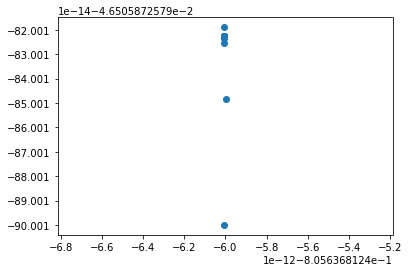

In [26]:

plt.plot(two_dim_Z[0][:,0], two_dim_Z[0][:,1], 'o')
# from sklearn.preprocessing import normalize

# two_dim_Z[0] - normalize(two_dim_Z[0])

In [35]:
### Loading predictions from RRM


rrm_save_path = 'checkpoints/bidirectional_exp21_tf/predictions/'
use_epochs=True
if not use_epochs:
    rrm_pred = pkl.load(open(rrm_save_path+'preds.pkl', 'rb'))
    rrm_reals = pkl.load(open(rrm_save_path+'reals.pkl', 'rb'))
    rrm_hiddens = pkl.load(open(rrm_save_path+'hiddens.pkl', 'rb'))
else:
    epocht = 349
    rrm_pred = pkl.load(open(rrm_save_path+'preds_{}.pkl'.format(epocht), 'rb'))
    rrm_reals = pkl.load(open(rrm_save_path+'reals_{}.pkl'.format(epocht), 'rb'))
    rrm_hiddens = pkl.load(open(rrm_save_path+'hiddens_{}.pkl'.format(epocht), 'rb'))

rrm_param = pkl.load(open('checkpoints/bidirectional_exp11/param_checkpoint.pkl', 'rb'))
rrm_param, rrm_reals[0]

({'batch_size': 512,
  'learning_rate': 0.01,
  'n_embed': 512,
  'n_hidden': 512,
  'nepochs': 20000,
  'use_cuda': True},
 array([23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6, 14,
        13, 15,  6, 22,  1,  5, 19, 18, 22, 19, 12, 14,  4,  3,  1, 19, 14,
         1,  9, 14, 19, 10, 12, 12,  0, 19, 10, 19,  6, 14, 15,  9,  8,  0,
        24]))

In [36]:

from sklearn.metrics import hamming_loss    
h_losses = []

for i in range(50):
#     print("PREDICTION {}: ".format(i))
#     print(",".join(rrm_pred[random_10,:][i].astype(str)))
#     print("REAL VALUE {}: ".format(i))
#     print(",".join(rrm_reals[random_10,:][i].astype(str)))
    h_losses.append(hamming_loss(rrm_reals[random_10,1:][i], rrm_pred[random_10,:][i]))

np.mean(h_losses)    

0.48541176470588243

In [18]:
random_10 = [np.random.randint(0,200) for x in range(50)]
print(random_10)
rrm_pred.shape

# pkl.dump(rrm_pred[random_10,:], open(rrm_save_path+'preds_10.pkl', 'wb'))
# pkl.dump(rrm_reals[random_10,:], open(rrm_save_path+'reals_10.pkl', 'wb'))
# pkl.dump(rrm_hiddens[:,random_10,:], open(rrm_save_path+'hiddens_10.pkl', 'wb'))

[82, 62, 9, 88, 164, 140, 69, 29, 79, 71, 138, 122, 128, 145, 99, 10, 83, 137, 175, 60, 137, 100, 121, 59, 113, 149, 74, 98, 8, 142, 82, 36, 69, 171, 196, 130, 9, 131, 55, 167, 32, 160, 187, 148, 102, 196, 118, 44, 56, 167]


(256, 85)

0.47717647058823531

(16915, 2)
(199, 85, 2)


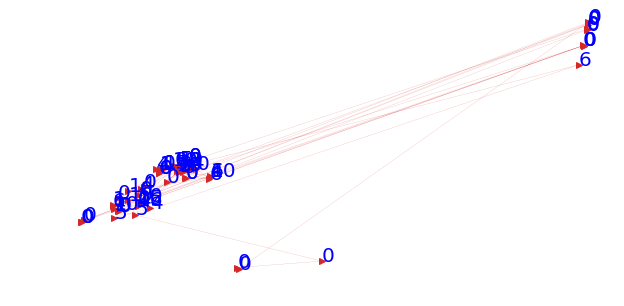

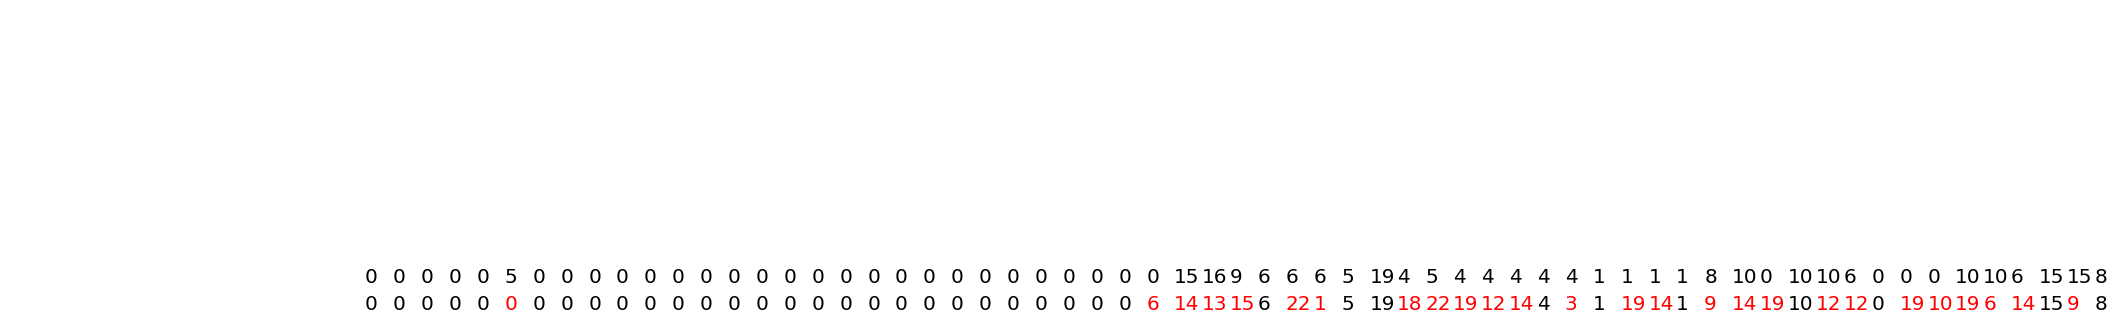

NameError: name 'normalize' is not defined

In [14]:
### Adapting Lihan's plots

def plot_paths(preds, reals, two_dim_Z):
    def PlotSample(sample, pred_symbols, pred_states, vec_projected):
        our_colors = colors *4
        plt.gcf().set_size_inches(10, 5)
        overall_x = []
        overall_y = []
        for i in range(20, 83):#num_symbols-1):
            x, y = vec_projected[i,0], vec_projected[i,1] 
            overall_x.append(x)
            overall_y.append(y)
            plt.plot(x,y, '-')
            next_x, next_y = vec_projected[i+1,0], vec_projected[i+1,1] 
            plt.text(x, y, '%d'%(pred_symbols[i]), fontsize=20, color = our_colors[sample[i%10]])
    #         plt.annotate(str(pred_symbols[i]), (x,y), fontsize=20)
#             plt.arrow(x, y, next_x - x, next_y - y, 
#                       color = our_colors[sample[i]], alpha= 0.5,
#                       shape='full', lw=0.1, length_includes_head=True, head_width=.02)


        plt.axis('off')
    #     plt.ylim(-0.6, 0.6)
    #     plt.xlim(-0.4, 0.6)
#         plt.savefig(save_path+'imgs/'+''.join([str(x) for x in sample])+'_tsne_200_samples.png')
        plt.plot(overall_x, overall_y, '->', lw=0.1)

        plt.show()
        # write out predicted sequence and actual sequence at the bottom 
        plt.gcf().set_size_inches(10, 5)
        plt.axis('off')
        for i in range(20, 83):#num_symbols-1):
            truth_color = 'black'
            if sample[i] != pred_symbols[i]:
                truth_color = 'red'
            plt.text( i/20-0.4, -.1, '%d'%(sample[i]), fontsize=20, color = truth_color)
            plt.text( i/20-0.4, -0.0, '%d'%(pred_symbols[i]), fontsize=20)#, color = colors[pred_states[i]])
#         plt.savefig(save_path+'imgs/'+''.join([str(x) for x in sample])+'_tsne_200_samples_sequences.png')
        plt.show()
        return



    colors = ['blue', 'green', 'red', 'cyan', 'brown', 'grey', 'orange', 'black', 'purple', 'olive']


    indexes_to_test = [x for x in range(100)]
    for i in range(10):
        PlotSample(reals[indexes_to_test[i]], preds[indexes_to_test[i],:], None, two_dim_Z[i])
        plt.show()
        PlotSample(reals[indexes_to_test[i]], preds[indexes_to_test[i],:], None, normalize(two_dim_Z[i]))
    return


tsne_try= True
pca_try = False
if tsne_try:
    tsne_obj = TSNE(n_components=2, perplexity=50, early_exaggeration=20)
    two_dim_Z_rrm = tsne_obj.fit_transform(rrm_hiddens[:,1:200,:].reshape(-1, 128*2))
    print(two_dim_Z_rrm.shape)
    two_dim_Z_rrm = two_dim_Z_rrm.reshape(-1, 85, 2)
    print(two_dim_Z_rrm.shape)

if pca_try:
    pca = PCA(n_components = 2)
    two_dim_Z_rrm = pca.fit_transform(rrm_hiddens[:,1:200,:].reshape(-1, 128*2))
    # print(two_dim_Z_rrm.shape)
    # two_dim_Z_rrm = two_dim_Z_rrm.reshape(-1, 85, 2)
    # print(two_dim_Z_rrm.shape)


# print(two_dim_Z_rrm.shape)
# two_dim_Z_rrm = two_dim_Z_rrm.reshape(-1, 85, 2)
# print(two_dim_Z_rrm.shape)
plot_paths(rrm_pred, rrm_reals[:,1:], two_dim_Z_rrm)


In [19]:
from sklearn.preprocessing import normalize
colors = ['blue', 'green', 'red', 'cyan', 'brown', 'grey', 'orange', 'black', 'purple', 'olive']


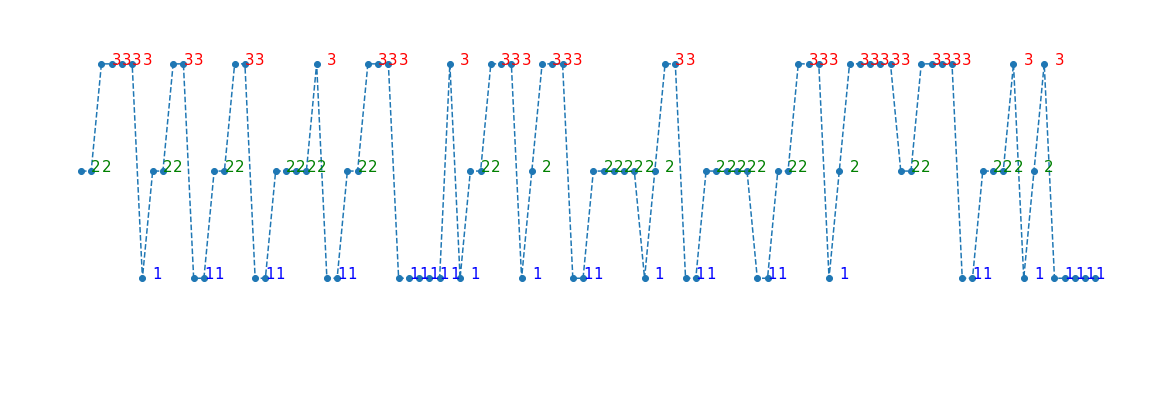

In [21]:
plt.figure(figsize=(20,7))
plt.plot(range(100), reals[0][1:]+1, '--o')
plt.ylim(-0.05, 3.5)
plt.axis('off')
for i in range(1,100):
    plt.text(i, reals[0][i]+1, '%d'%(reals[0][i]+1), fontsize=15, color = colors[reals[0][i]])